## Initialization

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr" ## "all"

%matplotlib inline
# %matplotlib qt
%load_ext autoreload
%autoreload 2

import numpy as np
import cv2
import glob
import pickle
import sys, os, pprint
from datetime import datetime, time

# from classes.pipeline import ALFPipeline
# from classes.videofile import VideoFile
from classes.camera import Camera
# from common.utils import display_one, display_two
pp = pprint.PrettyPrinter(indent=2, width=100)
print('Current working dir: ', os.getcwd())
 
try:
    user_paths = os.environ['PYTHONPATH'].split(os.pathsep)
except KeyError:
    user_paths = []

if '.' not in sys.path:
    print("appending '.' to sys.path")
    sys.path.append('.')
try:
    sys.path.remove('../classes')
except:
    pass
try:
    sys.path.remove('..')
except:
    pass
# pp.pprint(sys.path)

# if './classes' not in sys.path:
#     print("appending ./classes to sys.path")
#     sys.path.append('./classes')
    
np_format = {}
np_format['float'] = lambda x: "%12.6f" % x
np_format['int']   = lambda x: "%10d" % x
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =100, formatter = np_format)


# print(datetime.now())
# print(datetime.time(datetime.now()))
print('-'*50)


# sampleImages = glob.glob('./test_images/*.jpg')
# sampleCount = len(sampleImages)
# sampleIndexes = range(sampleCount)
sampleVideos = glob.glob('./test_videos/*.mp4')
sampleCount = len(sampleVideos)
sampleIndexes = range(sampleCount)

print()
print(' Sample Videos Filenames: ')
print(' ----------------------- ')
for fn in sampleVideos:
    print('  ', fn)
print()

try: 
    del cameraConfig
    print(' Existing Camera object deleted')
except: 
    print(' Camera object doesnt exist')
    pass
with open('./cameraConfig_0.pkl', 'rb') as infile:
    cameraConfig = pickle.load(infile)
    print(' Camera calibration file loaded ...')
    
print()
print(' Camera Calibration Matrix :')
print(' ---------------------------')
print(cameraConfig.cameraMatrix)



Current working dir:  E:\Users\kevin\OneDrive\git_projs\CarND-Advanced-Lane-Lines
--------------------------------------------------

 Sample Videos Filenames: 
 ----------------------- 
   ./test_videos\challenge_video.mp4
   ./test_videos\harder_challenge_video.mp4
   ./test_videos\project_video.mp4

 Camera object doesnt exist
 Camera calibration file loaded ...

 Camera Calibration Matrix :
 ---------------------------
[[ 1157.778183     0.000000   667.113857]
 [    0.000000  1152.822174   386.124583]
 [    0.000000     0.000000     1.000000]]


## ALF Pipeline - Process `project_video.mp4` 

### Define pipeline

In [26]:
from classes.pipeline import ALFPipeline
from classes.videofile import VideoFile
from common.utils import display_one, display_two
from 
VIDEO_INPUT = sampleVideos[2]
FROM_FRAME  = 0
TO_FRAME    = 9999

try: 
    del videoPipeline
except: 
    pass
#                             x_src_top_left  =  515,  ## 600 - x_disp_top,
#                             x_src_top_right =  726,  ## - x_disp_top,  
#                             x_src_bot_left  =  165,  ## 295 - x_disp_bot, 
#                             x_src_bot_right = 1015,  ##  - x_disp_bot,
#                             y_src_top       =  480,
#                             y_src_bot       =  700)

Pipeline = ALFPipeline(cameraConfig,
                            history               =   8,
                            RoI_x_adj             =  30,

                            ## specfic settings for project video -----------
                            y_src_top             = 480,
                            y_src_bot             = 690,
                            displayRegionTop      = 480,
                            displayRegionBot      = 690,
                            lowlight_threshold    = 'cmb_rgb_lvl_sat',
                            ## ----------------------------------------------

                            rgb_mean_threshold    = 175,
                            init_window_search_margin = 65,
                            window_search_margin  =  65,
                            poly_search_margin    =  50,
                            pixel_ratio_threshold =  30,
                            offcntr_roi_threshold =  80)

Pipeline.inVideo = VideoFile(VIDEO_INPUT, mode = 'input', fromFrame = FROM_FRAME, toFrame = TO_FRAME)
Pipeline.outVideo = VideoFile(VIDEO_INPUT, mode= 'output', outputPath = './challenge_output_videos',suffix = '05-11-20', like = Pipeline.inVideo)
Pipeline.display_thresholds()

1  cond:  xhigh
      thr :  ksize     7
      thr :  x_thr     (30, 255)
      thr :  y_thr     (70, 255)
      thr :  mag_thr     (35, 255)
      thr :  dir_thr     (40, 65)
      thr :  sat_thr     (110, 255)
      thr :  lvl_thr     (205, 255)
      thr :  rgb_thr     (205, 255)
      thr :  hue_thr     None
1  cond:  high
      thr :  ksize     7
      thr :  x_thr     (30, 255)
      thr :  y_thr     (70, 255)
      thr :  mag_thr     (35, 255)
      thr :  dir_thr     (40, 65)
      thr :  sat_thr     (110, 255)
      thr :  lvl_thr     (205, 255)
      thr :  rgb_thr     (205, 255)
      thr :  hue_thr     None
1  cond:  med
      thr :  ksize     7
      thr :  x_thr     (30, 255)
      thr :  y_thr     (70, 255)
      thr :  mag_thr     (35, 255)
      thr :  dir_thr     (40, 65)
      thr :  sat_thr     (110, 255)
      thr :  lvl_thr     (205, 255)
      thr :  rgb_thr     (205, 255)
      thr :  hue_thr     None
1  cond:  low
      thr :  ksize     7
      thr :  x_thr    

In [27]:
# Pipeline.mode
# Pipeline.thresholdMethods[1]

In [28]:
print(' Next frame to read set to : ', Pipeline.inVideo.videoFile.get(cv2.CAP_PROP_POS_FRAMES), ' currFrameNum: ', Pipeline.inVideo.currFrameNum)
print(' Frame range starting from : ', Pipeline.inVideo.fromFrame, ' ending at frame: ', Pipeline.inVideo.toFrame) 
 

 Next frame to read set to :  0.0  currFrameNum:  0.0
 Frame range starting from :  0  ending at frame:  1260


In [29]:
INFO_INTERVAL = 50
MODE    = 1 
DISPLAY = False
DEBUG   = False
DEBUG2  = False

rc1 = Pipeline.inVideo.getNextFrame()

while rc1:
    output, disp = Pipeline(mode = MODE, displayResults = DISPLAY, debug = DEBUG, debug2 = DEBUG2)
    Pipeline.outVideo.saveFrameToVideo(output, debug = False)        
#   Pipeline.outVideo.saveFrameToImage(output, frameNum = Pipeline.inVideo.currFrameNum, debug = False)

    if Pipeline.inVideo.currFrameNum % INFO_INTERVAL == 0 :
        print(' > ',datetime.time(datetime.now())," - " , Pipeline.inVideo.frameTitle  )
#         display_one(output, size= 10, title = Pipeline.inVideo.frameTitle)    
    
    rc1 = Pipeline.inVideo.getNextFrame()

print(' getNextFrame() returned : ', rc1)
Pipeline.outVideo.closeVideoFile()

Frame:    0 - 0.0 ms - Image RGB: 116  (102,116,130)         WARPED RGB:  84  HLS:  78   H: 130   L:  84   S:  19    LOWSAT - cmb_hue_x 
 reset_x_base  True
  NZ pixels  - in image  :    54447   search reg:    53799      Nz to imgPixel Ratio: % 5.91    Nz to SrchRegion Ratio : %28.74    Nz to ImageNz Ratio: %98.81
  Detected Pixel Count L :    43444   R         :    10355      Detected Pixel Ratio  L: %46.41    R: %11.06 
  Perspective transform source points -  OffCtr Pxls: -63.0    max_diffs: 38    imgPxlRatio: 5.91  acceptCode: 0
  Adjust perspective transform source points -  OffCtr Pxls: -63.0    max_diffs: 38    imgPxlRatio: 5.91 
 >  18:42:08.077350  -  Frame:    0  pos(ms): 0      
Frame:    1 - 40.0 ms - Image RGB: 116  (103,116,130)         WARPED RGB:  84  HLS:  76   H: 127   L:  84   S:  18    LOWSAT - cmb_hue_x 
  NZ pixels  - in image  :    48993   search reg:    48667      Nz to imgPixel Ratio: % 5.32    Nz to SrchRegion Ratio : %26.00    Nz to ImageNz Ratio: %99.33
  De

Frame:   16 - 640.0 ms - Image RGB: 118  (103,117,132)         WARPED RGB:  86  HLS:  76   H: 120   L:  86   S:  20    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    56054   search reg:    43417      Nz to imgPixel Ratio: % 6.08    Nz to SrchRegion Ratio : %30.15    Nz to ImageNz Ratio: %77.45
  Detected Pixel Count L :    25572   R         :    17845      Detected Pixel Ratio  L: %35.52    R: %24.78 
  Perspective transform source points -  OffCtr Pxls: -11.0    max_diffs: 12    imgPxlRatio: 6.08  acceptCode: 0
Frame:   17 - 680.0 ms - Image RGB: 118  (104,118,132)         WARPED RGB:  86  HLS:  75   H: 120   L:  86   S:  20    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    53564   search reg:    42104      Nz to imgPixel Ratio: % 5.81    Nz to SrchRegion Ratio : %29.24    Nz to ImageNz Ratio: %78.60
  Detected Pixel Count L :    25562   R         :    16542      Detected Pixel Ratio  L: %35.50    R: %22.98 
  Perspective transform source points -  OffCtr Pxls: -10.0    max_diffs:

  NZ pixels  - in image  :    45449   search reg:    44752      Nz to imgPixel Ratio: % 4.93    Nz to SrchRegion Ratio : %31.08    Nz to ImageNz Ratio: %98.46
  Detected Pixel Count L :    35154   R         :     9598      Detected Pixel Ratio  L: %48.83    R: %13.33 
  Perspective transform source points -  OffCtr Pxls: 1.0    max_diffs: 6    imgPxlRatio: 4.93  acceptCode: 0
Frame:   33 - 1320.0 ms - Image RGB: 116  (102,116,131)         WARPED RGB:  83  HLS:  74   H: 121   L:  83   S:  19    LOWSAT - cmb_hue_x 
  NZ pixels  - in image  :    44712   search reg:    43270      Nz to imgPixel Ratio: % 4.85    Nz to SrchRegion Ratio : %30.05    Nz to ImageNz Ratio: %96.77
  Detected Pixel Count L :    34392   R         :     8878      Detected Pixel Ratio  L: %47.77    R: %12.33 
  Perspective transform source points -  OffCtr Pxls: 1.0    max_diffs: 6    imgPxlRatio: 4.85  acceptCode: 0
Frame:   34 - 1360.0 ms - Image RGB: 116  (102,116,131)         WARPED RGB:  83  HLS:  75   H: 122   L

Frame:   64 - 2560.0 ms - Image RGB: 118  (104,118,133)         WARPED RGB:  84  HLS:  75   H: 123   L:  84   S:  19    LOWSAT - cmb_hue_x 
  NZ pixels  - in image  :    46290   search reg:    46119      Nz to imgPixel Ratio: % 5.02    Nz to SrchRegion Ratio : %32.03    Nz to ImageNz Ratio: %99.63
  Detected Pixel Count L :    35150   R         :    10969      Detected Pixel Ratio  L: %48.82    R: %15.23 
  Perspective transform source points -  OffCtr Pxls: 8.0    max_diffs: 21    imgPxlRatio: 5.02  acceptCode: 0
Frame:   65 - 2600.0 ms - Image RGB: 118  (104,118,133)         WARPED RGB:  84  HLS:  75   H: 122   L:  84   S:  19    LOWSAT - cmb_hue_x 
  NZ pixels  - in image  :    48708   search reg:    48137      Nz to imgPixel Ratio: % 5.29    Nz to SrchRegion Ratio : %33.43    Nz to ImageNz Ratio: %98.83
  Detected Pixel Count L :    35176   R         :    12961      Detected Pixel Ratio  L: %48.86    R: %18.00 
  Perspective transform source points -  OffCtr Pxls: 7.0    max_diffs:

  NZ pixels  - in image  :    48745   search reg:    48734      Nz to imgPixel Ratio: % 5.29    Nz to SrchRegion Ratio : %33.84    Nz to ImageNz Ratio: %99.98
  Detected Pixel Count L :    36116   R         :    12618      Detected Pixel Ratio  L: %50.16    R: %17.52 
  Perspective transform source points -  OffCtr Pxls: 20.0    max_diffs: 13    imgPxlRatio: 5.29  acceptCode: 0
Frame:   81 - 3240.0 ms - Image RGB: 118  (104,117,132)         WARPED RGB:  84  HLS:  77   H: 129   L:  84   S:  19    LOWSAT - cmb_hue_x 
  NZ pixels  - in image  :    47140   search reg:    47132      Nz to imgPixel Ratio: % 5.12    Nz to SrchRegion Ratio : %32.73    Nz to ImageNz Ratio: %99.98
  Detected Pixel Count L :    36193   R         :    10939      Detected Pixel Ratio  L: %50.27    R: %15.19 
  Perspective transform source points -  OffCtr Pxls: 22.0    max_diffs: 14    imgPxlRatio: 5.12  acceptCode: 0
Frame:   82 - 3280.0 ms - Image RGB: 117  (104,117,132)         WARPED RGB:  84  HLS:  77   H: 128

  NZ pixels  - in image  :    44172   search reg:    44064      Nz to imgPixel Ratio: % 4.79    Nz to SrchRegion Ratio : %30.60    Nz to ImageNz Ratio: %99.75
  Detected Pixel Count L :    35106   R         :     8958      Detected Pixel Ratio  L: %48.76    R: %12.44 
  Perspective transform source points -  OffCtr Pxls: 23.0    max_diffs: 12    imgPxlRatio: 4.79  acceptCode: 0
Frame:   97 - 3880.0 ms - Image RGB: 116  (102,115,131)         WARPED RGB:  83  HLS:  76   H: 127   L:  83   S:  18    LOWSAT - cmb_hue_x 
  NZ pixels  - in image  :    43880   search reg:    43780      Nz to imgPixel Ratio: % 4.76    Nz to SrchRegion Ratio : %30.40    Nz to ImageNz Ratio: %99.77
  Detected Pixel Count L :    34538   R         :     9242      Detected Pixel Ratio  L: %47.97    R: %12.84 
  Perspective transform source points -  OffCtr Pxls: 25.0    max_diffs: 13    imgPxlRatio: 4.76  acceptCode: 0
Frame:   98 - 3920.0 ms - Image RGB: 116  (102,115,130)         WARPED RGB:  83  HLS:  76   H: 126

Frame:  112 - 4480.0 ms - Image RGB: 115  (102,115,129)         WARPED RGB:  83  HLS:  77   H: 128   L:  83   S:  19    LOWSAT - cmb_hue_x 
  NZ pixels  - in image  :    42414   search reg:    42277      Nz to imgPixel Ratio: % 4.60    Nz to SrchRegion Ratio : %29.36    Nz to ImageNz Ratio: %99.67
  Detected Pixel Count L :    33890   R         :     8387      Detected Pixel Ratio  L: %47.07    R: %11.65 
  Perspective transform source points -  OffCtr Pxls: 14.0    max_diffs: 7    imgPxlRatio: 4.6  acceptCode: 0
Frame:  113 - 4520.0 ms - Image RGB: 116  (103,115,129)         WARPED RGB:  84  HLS:  76   H: 127   L:  83   S:  18    LOWSAT - cmb_hue_x 
  NZ pixels  - in image  :    42478   search reg:    42317      Nz to imgPixel Ratio: % 4.61    Nz to SrchRegion Ratio : %29.39    Nz to ImageNz Ratio: %99.62
  Detected Pixel Count L :    34289   R         :     8028      Detected Pixel Ratio  L: %47.62    R: %11.15 
  Perspective transform source points -  OffCtr Pxls: 17.0    max_diffs:

Frame:  128 - 5120.0 ms - Image RGB: 117  (104,116,131)         WARPED RGB:  85  HLS:  75   H: 123   L:  84   S:  18    LOWSAT - cmb_hue_x 
  NZ pixels  - in image  :    46173   search reg:    45623      Nz to imgPixel Ratio: % 5.01    Nz to SrchRegion Ratio : %31.68    Nz to ImageNz Ratio: %98.81
  Detected Pixel Count L :    33953   R         :    11670      Detected Pixel Ratio  L: %47.16    R: %16.21 
  Perspective transform source points -  OffCtr Pxls: 1.0    max_diffs: 14    imgPxlRatio: 5.01  acceptCode: 0
Frame:  129 - 5160.0 ms - Image RGB: 117  (104,117,131)         WARPED RGB:  85  HLS:  75   H: 124   L:  84   S:  18    LOWSAT - cmb_hue_x 
  NZ pixels  - in image  :    46222   search reg:    46033      Nz to imgPixel Ratio: % 5.02    Nz to SrchRegion Ratio : %31.97    Nz to ImageNz Ratio: %99.59
  Detected Pixel Count L :    33099   R         :    12934      Detected Pixel Ratio  L: %45.97    R: %17.96 
  Perspective transform source points -  OffCtr Pxls: 0.0    max_diffs:

Frame:  144 - 5760.0 ms - Image RGB: 117  (103,117,131)         WARPED RGB:  84  HLS:  74   H: 118   L:  84   S:  19    LOWSAT - cmb_hue_x 
  NZ pixels  - in image  :    61169   search reg:    45971      Nz to imgPixel Ratio: % 6.64    Nz to SrchRegion Ratio : %31.92    Nz to ImageNz Ratio: %75.15
  Detected Pixel Count L :    33779   R         :    12192      Detected Pixel Ratio  L: %46.92    R: %16.93 
  Perspective transform source points -  OffCtr Pxls: -5.0    max_diffs: 10    imgPxlRatio: 6.64  acceptCode: 0
Frame:  145 - 5800.0 ms - Image RGB: 117  (103,116,131)         WARPED RGB:  84  HLS:  74   H: 119   L:  84   S:  19    LOWSAT - cmb_hue_x 
  NZ pixels  - in image  :    60590   search reg:    43512      Nz to imgPixel Ratio: % 6.57    Nz to SrchRegion Ratio : %30.22    Nz to ImageNz Ratio: %71.81
  Detected Pixel Count L :    33995   R         :     9517      Detected Pixel Ratio  L: %47.22    R: %13.22 
  Perspective transform source points -  OffCtr Pxls: -5.0    max_diff

Frame:  160 - 6400.0 ms - Image RGB: 117  (103,117,132)         WARPED RGB:  81  HLS:  75   H: 125   L:  82   S:  19    LOWSAT - cmb_hue_x 
  NZ pixels  - in image  :    41600   search reg:    41254      Nz to imgPixel Ratio: % 4.51    Nz to SrchRegion Ratio : %28.65    Nz to ImageNz Ratio: %99.17
  Detected Pixel Count L :    33280   R         :     7974      Detected Pixel Ratio  L: %46.22    R: %11.07 
  Perspective transform source points -  OffCtr Pxls: 4.0    max_diffs: 11    imgPxlRatio: 4.51  acceptCode: 0
Frame:  161 - 6440.0 ms - Image RGB: 118  (103,117,132)         WARPED RGB:  81  HLS:  75   H: 125   L:  81   S:  19    LOWSAT - cmb_hue_x 
  NZ pixels  - in image  :    42231   search reg:    42001      Nz to imgPixel Ratio: % 4.58    Nz to SrchRegion Ratio : %29.17    Nz to ImageNz Ratio: %99.45
  Detected Pixel Count L :    34094   R         :     7907      Detected Pixel Ratio  L: %47.35    R: %10.98 
  Perspective transform source points -  OffCtr Pxls: 5.0    max_diffs:

  Perspective transform source points -  OffCtr Pxls: 19.0    max_diffs: 14    imgPxlRatio: 4.61  acceptCode: 0
Frame:  176 - 7040.0 ms - Image RGB: 117  (103,117,133)         WARPED RGB:  79  HLS:  75   H: 127   L:  79   S:  20    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    39487   search reg:    37263      Nz to imgPixel Ratio: % 4.28    Nz to SrchRegion Ratio : %25.88    Nz to ImageNz Ratio: %94.37
  Detected Pixel Count L :    25060   R         :    12203      Detected Pixel Ratio  L: %34.81    R: %16.95 
  Perspective transform source points -  OffCtr Pxls: 20.0    max_diffs: 16    imgPxlRatio: 4.28  acceptCode: 0
Frame:  177 - 7080.0 ms - Image RGB: 117  (103,117,133)         WARPED RGB:  79  HLS:  75   H: 126   L:  80   S:  20    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    41341   search reg:    39138      Nz to imgPixel Ratio: % 4.49    Nz to SrchRegion Ratio : %27.18    Nz to ImageNz Ratio: %94.67
  Detected Pixel Count L :    25211   R         :    13927      Detect

  NZ pixels  - in image  :    40164   search reg:    37342      Nz to imgPixel Ratio: % 4.36    Nz to SrchRegion Ratio : %25.93    Nz to ImageNz Ratio: %92.97
  Detected Pixel Count L :    23064   R         :    14278      Detected Pixel Ratio  L: %32.03    R: %19.83 
  Perspective transform source points -  OffCtr Pxls: 5.0    max_diffs: 20    imgPxlRatio: 4.36  acceptCode: 0
Frame:  193 - 7720.0 ms - Image RGB: 116  (101,116,132)         WARPED RGB:  78  HLS:  74   H: 123   L:  78   S:  19    LOWSAT - cmb_hue_x 
  NZ pixels  - in image  :    42819   search reg:    42606      Nz to imgPixel Ratio: % 4.65    Nz to SrchRegion Ratio : %29.59    Nz to ImageNz Ratio: %99.50
  Detected Pixel Count L :    32730   R         :     9876      Detected Pixel Ratio  L: %45.46    R: %13.72 
  Perspective transform source points -  OffCtr Pxls: 6.0    max_diffs: 21    imgPxlRatio: 4.65  acceptCode: 0
Frame:  194 - 7760.0 ms - Image RGB: 116  (101,116,131)         WARPED RGB:  77  HLS:  74   H: 124  

  NZ pixels  - in image  :    39211   search reg:    36757      Nz to imgPixel Ratio: % 4.25    Nz to SrchRegion Ratio : %25.53    Nz to ImageNz Ratio: %93.74
  Detected Pixel Count L :    24500   R         :    12257      Detected Pixel Ratio  L: %34.03    R: %17.02 
  Perspective transform source points -  OffCtr Pxls: 10.0    max_diffs: 17    imgPxlRatio: 4.25  acceptCode: 0
Frame:  209 - 8360.0 ms - Image RGB: 115  (100,114,130)         WARPED RGB:  77  HLS:  75   H: 128   L:  77   S:  20    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    39817   search reg:    37531      Nz to imgPixel Ratio: % 4.32    Nz to SrchRegion Ratio : %26.06    Nz to ImageNz Ratio: %94.26
  Detected Pixel Count L :    24647   R         :    12884      Detected Pixel Ratio  L: %34.23    R: %17.89 
  Perspective transform source points -  OffCtr Pxls: 9.0    max_diffs: 16    imgPxlRatio: 4.32  acceptCode: 0
Frame:  210 - 8400.0 ms - Image RGB: 114  (100,114,130)         WARPED RGB:  77  HLS:  74   H: 126  

  NZ pixels  - in image  :    38071   search reg:    35772      Nz to imgPixel Ratio: % 4.13    Nz to SrchRegion Ratio : %24.84    Nz to ImageNz Ratio: %93.96
  Detected Pixel Count L :    24991   R         :    10781      Detected Pixel Ratio  L: %34.71    R: %14.97 
  Perspective transform source points -  OffCtr Pxls: 21.0    max_diffs: 21    imgPxlRatio: 4.13  acceptCode: 0
Frame:  225 - 9000.0 ms - Image RGB: 114  (101,113,128)         WARPED RGB:  78  HLS:  74   H: 124   L:  78   S:  19    LOWSAT - cmb_hue_x 
  NZ pixels  - in image  :    45249   search reg:    45082      Nz to imgPixel Ratio: % 4.91    Nz to SrchRegion Ratio : %31.31    Nz to ImageNz Ratio: %99.63
  Detected Pixel Count L :    35714   R         :     9368      Detected Pixel Ratio  L: %49.60    R: %13.01 
  Perspective transform source points -  OffCtr Pxls: 21.0    max_diffs: 22    imgPxlRatio: 4.91  acceptCode: 0
Frame:  226 - 9040.0 ms - Image RGB: 114  (101,114,128)         WARPED RGB:  78  HLS:  73   H: 123

  NZ pixels  - in image  :    43115   search reg:    41370      Nz to imgPixel Ratio: % 4.68    Nz to SrchRegion Ratio : %28.73    Nz to ImageNz Ratio: %95.95
  Detected Pixel Count L :    25019   R         :    16351      Detected Pixel Ratio  L: %34.75    R: %22.71 
  Perspective transform source points -  OffCtr Pxls: 40.0    max_diffs: 25    imgPxlRatio: 4.68  acceptCode: 0
Frame:  241 - 9640.0 ms - Image RGB: 112  ( 99,112,126)         WARPED RGB:  77  HLS:  74   H: 123   L:  77   S:  21    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    43249   search reg:    41205      Nz to imgPixel Ratio: % 4.69    Nz to SrchRegion Ratio : %28.61    Nz to ImageNz Ratio: %95.27
  Detected Pixel Count L :    25334   R         :    15871      Detected Pixel Ratio  L: %35.19    R: %22.04 
  Perspective transform source points -  OffCtr Pxls: 40.0    max_diffs: 23    imgPxlRatio: 4.69  acceptCode: 0
Frame:  242 - 9680.0 ms - Image RGB: 112  (100,111,126)         WARPED RGB:  77  HLS:  74   H: 124 

Frame:  256 - 10240.0 ms - Image RGB: 112  (100,111,125)         WARPED RGB:  77  HLS:  75   H: 128   L:  77   S:  19    LOWSAT - cmb_hue_x 
  NZ pixels  - in image  :    43364   search reg:    43335      Nz to imgPixel Ratio: % 4.71    Nz to SrchRegion Ratio : %30.09    Nz to ImageNz Ratio: %99.93
  Detected Pixel Count L :    35426   R         :     7909      Detected Pixel Ratio  L: %49.20    R: %10.98 
  Perspective transform source points -  OffCtr Pxls: 47.0    max_diffs: 22    imgPxlRatio: 4.71  acceptCode: 0
Frame:  257 - 10280.0 ms - Image RGB: 112  (100,111,125)         WARPED RGB:  77  HLS:  75   H: 129   L:  77   S:  19    LOWSAT - cmb_hue_x 
  NZ pixels  - in image  :    43711   search reg:    43621      Nz to imgPixel Ratio: % 4.74    Nz to SrchRegion Ratio : %30.29    Nz to ImageNz Ratio: %99.79
  Detected Pixel Count L :    35163   R         :     8458      Detected Pixel Ratio  L: %48.84    R: %11.75 
  Perspective transform source points -  OffCtr Pxls: 47.0    max_di

Frame:  272 - 10880.0 ms - Image RGB: 112  (100,111,125)         WARPED RGB:  77  HLS:  74   H: 127   L:  77   S:  19    LOWSAT - cmb_hue_x 
  NZ pixels  - in image  :    43783   search reg:    43571      Nz to imgPixel Ratio: % 4.75    Nz to SrchRegion Ratio : %30.26    Nz to ImageNz Ratio: %99.51
  Detected Pixel Count L :    36437   R         :     7134      Detected Pixel Ratio  L: %50.61    R: % 9.91 
  Perspective transform source points -  OffCtr Pxls: 39.0    max_diffs: 16    imgPxlRatio: 4.75  acceptCode: 0
Frame:  273 - 10920.0 ms - Image RGB: 112  (100,111,125)         WARPED RGB:  78  HLS:  75   H: 128   L:  77   S:  19    LOWSAT - cmb_hue_x 
  NZ pixels  - in image  :    43781   search reg:    43567      Nz to imgPixel Ratio: % 4.75    Nz to SrchRegion Ratio : %30.25    Nz to ImageNz Ratio: %99.51
  Detected Pixel Count L :    34672   R         :     8895      Detected Pixel Ratio  L: %48.16    R: %12.35 
  Perspective transform source points -  OffCtr Pxls: 40.0    max_di

  NZ pixels  - in image  :    48055   search reg:    47822      Nz to imgPixel Ratio: % 5.21    Nz to SrchRegion Ratio : %33.21    Nz to ImageNz Ratio: %99.51
  Detected Pixel Count L :    34547   R         :    13275      Detected Pixel Ratio  L: %47.98    R: %18.44 
  Perspective transform source points -  OffCtr Pxls: 22.0    max_diffs: 8    imgPxlRatio: 5.21  acceptCode: 0
Frame:  289 - 11560.0 ms - Image RGB: 113  (101,112,126)         WARPED RGB:  79  HLS:  76   H: 130   L:  79   S:  19    LOWSAT - cmb_hue_x 
  NZ pixels  - in image  :    47465   search reg:    47356      Nz to imgPixel Ratio: % 5.15    Nz to SrchRegion Ratio : %32.89    Nz to ImageNz Ratio: %99.77
  Detected Pixel Count L :    34407   R         :    12949      Detected Pixel Ratio  L: %47.79    R: %17.98 
  Perspective transform source points -  OffCtr Pxls: 20.0    max_diffs: 7    imgPxlRatio: 5.15  acceptCode: 0
Frame:  290 - 11600.0 ms - Image RGB: 113  (101,112,126)         WARPED RGB:  79  HLS:  75   H: 129

Frame:  304 - 12160.0 ms - Image RGB: 112  (101,111,125)         WARPED RGB:  79  HLS:  76   H: 132   L:  79   S:  18    LOWSAT - cmb_hue_x 
  NZ pixels  - in image  :    44232   search reg:    44228      Nz to imgPixel Ratio: % 4.80    Nz to SrchRegion Ratio : %30.71    Nz to ImageNz Ratio: %99.99
  Detected Pixel Count L :    36372   R         :     7856      Detected Pixel Ratio  L: %50.52    R: %10.91 
  Perspective transform source points -  OffCtr Pxls: 12.0    max_diffs: 4    imgPxlRatio: 4.8  acceptCode: 0
Frame:  305 - 12200.0 ms - Image RGB: 113  (101,112,125)         WARPED RGB:  79  HLS:  76   H: 131   L:  79   S:  18    LOWSAT - cmb_hue_x 
  NZ pixels  - in image  :    42756   search reg:    42748      Nz to imgPixel Ratio: % 4.64    Nz to SrchRegion Ratio : %29.69    Nz to ImageNz Ratio: %99.98
  Detected Pixel Count L :    35277   R         :     7471      Detected Pixel Ratio  L: %49.00    R: %10.38 
  Perspective transform source points -  OffCtr Pxls: 13.0    max_diff

  NZ pixels  - in image  :    44833   search reg:    43392      Nz to imgPixel Ratio: % 4.86    Nz to SrchRegion Ratio : %30.13    Nz to ImageNz Ratio: %96.78
  Detected Pixel Count L :    36065   R         :     7327      Detected Pixel Ratio  L: %50.09    R: %10.18 
  Perspective transform source points -  OffCtr Pxls: 11.0    max_diffs: 6    imgPxlRatio: 4.86  acceptCode: 0
Frame:  321 - 12840.0 ms - Image RGB: 112  (101,111,124)         WARPED RGB:  79  HLS:  74   H: 124   L:  79   S:  19    LOWSAT - cmb_hue_x 
  NZ pixels  - in image  :    43536   search reg:    42579      Nz to imgPixel Ratio: % 4.72    Nz to SrchRegion Ratio : %29.57    Nz to ImageNz Ratio: %97.80
  Detected Pixel Count L :    35513   R         :     7066      Detected Pixel Ratio  L: %49.32    R: % 9.81 
  Perspective transform source points -  OffCtr Pxls: 12.0    max_diffs: 6    imgPxlRatio: 4.72  acceptCode: 0
Frame:  322 - 12880.0 ms - Image RGB: 112  (101,111,124)         WARPED RGB:  79  HLS:  74   H: 124

  NZ pixels  - in image  :    48699   search reg:    48595      Nz to imgPixel Ratio: % 5.28    Nz to SrchRegion Ratio : %33.75    Nz to ImageNz Ratio: %99.78
  Detected Pixel Count L :    35204   R         :    13391      Detected Pixel Ratio  L: %48.89    R: %18.60 
  Perspective transform source points -  OffCtr Pxls: 7.0    max_diffs: 8    imgPxlRatio: 5.28  acceptCode: 0
Frame:  337 - 13480.0 ms - Image RGB: 110  (100,109,120)         WARPED RGB:  80  HLS:  75   H: 127   L:  80   S:  19    LOWSAT - cmb_hue_x 
  NZ pixels  - in image  :    47881   search reg:    47810      Nz to imgPixel Ratio: % 5.20    Nz to SrchRegion Ratio : %33.20    Nz to ImageNz Ratio: %99.85
  Detected Pixel Count L :    35604   R         :    12206      Detected Pixel Ratio  L: %49.45    R: %16.95 
  Perspective transform source points -  OffCtr Pxls: 8.0    max_diffs: 8    imgPxlRatio: 5.2  acceptCode: 0
Frame:  338 - 13520.0 ms - Image RGB: 110  (100,109,120)         WARPED RGB:  80  HLS:  75   H: 126   

Frame:  352 - 14080.0 ms - Image RGB: 108  ( 99,107,119)         WARPED RGB:  80  HLS:  76   H: 130   L:  80   S:  18    LOWSAT - cmb_hue_x 
  NZ pixels  - in image  :    44815   search reg:    44806      Nz to imgPixel Ratio: % 4.86    Nz to SrchRegion Ratio : %31.12    Nz to ImageNz Ratio: %99.98
  Detected Pixel Count L :    35373   R         :     9433      Detected Pixel Ratio  L: %49.13    R: %13.10 
  Perspective transform source points -  OffCtr Pxls: 7.0    max_diffs: 6    imgPxlRatio: 4.86  acceptCode: 0
Frame:  353 - 14120.0 ms - Image RGB: 108  ( 99,107,119)         WARPED RGB:  80  HLS:  75   H: 128   L:  79   S:  18    LOWSAT - cmb_hue_x 
  NZ pixels  - in image  :    43723   search reg:    43599      Nz to imgPixel Ratio: % 4.74    Nz to SrchRegion Ratio : %30.28    Nz to ImageNz Ratio: %99.71
  Detected Pixel Count L :    35060   R         :     8539      Detected Pixel Ratio  L: %48.69    R: %11.86 
  Perspective transform source points -  OffCtr Pxls: 7.0    max_diffs

Frame:  368 - 14720.0 ms - Image RGB: 106  ( 97,105,116)         WARPED RGB:  80  HLS:  76   H: 129   L:  80   S:  18    LOWSAT - cmb_hue_x 
  NZ pixels  - in image  :    44022   search reg:    43046      Nz to imgPixel Ratio: % 4.78    Nz to SrchRegion Ratio : %29.89    Nz to ImageNz Ratio: %97.78
  Detected Pixel Count L :    34898   R         :     8148      Detected Pixel Ratio  L: %48.47    R: %11.32 
  Perspective transform source points -  OffCtr Pxls: 5.0    max_diffs: 8    imgPxlRatio: 4.78  acceptCode: 0
Frame:  369 - 14760.0 ms - Image RGB: 106  ( 97,105,116)         WARPED RGB:  80  HLS:  76   H: 129   L:  80   S:  18    LOWSAT - cmb_hue_x 
  NZ pixels  - in image  :    45008   search reg:    44730      Nz to imgPixel Ratio: % 4.88    Nz to SrchRegion Ratio : %31.06    Nz to ImageNz Ratio: %99.38
  Detected Pixel Count L :    35455   R         :     9275      Detected Pixel Ratio  L: %49.24    R: %12.88 
  Perspective transform source points -  OffCtr Pxls: 11.0    max_diff

  NZ pixels  - in image  :    51652   search reg:    49212      Nz to imgPixel Ratio: % 5.60    Nz to SrchRegion Ratio : %34.17    Nz to ImageNz Ratio: %95.27
  Detected Pixel Count L :    35420   R         :    13792      Detected Pixel Ratio  L: %49.19    R: %19.16 
  Perspective transform source points -  OffCtr Pxls: 13.0    max_diffs: 9    imgPxlRatio: 5.6  acceptCode: 0
Frame:  385 - 15400.0 ms - Image RGB: 112  (103,111,122)         WARPED RGB:  84  HLS:  75   H: 124   L:  84   S:  18    LOWSAT - cmb_hue_x 
  NZ pixels  - in image  :    50591   search reg:    48855      Nz to imgPixel Ratio: % 5.49    Nz to SrchRegion Ratio : %33.93    Nz to ImageNz Ratio: %96.57
  Detected Pixel Count L :    34460   R         :    14395      Detected Pixel Ratio  L: %47.86    R: %19.99 
  Perspective transform source points -  OffCtr Pxls: 13.0    max_diffs: 8    imgPxlRatio: 5.49  acceptCode: 0
Frame:  386 - 15440.0 ms - Image RGB: 111  (102,111,121)         WARPED RGB:  83  HLS:  75   H: 124 

  NZ pixels  - in image  :    44976   search reg:    44761      Nz to imgPixel Ratio: % 4.88    Nz to SrchRegion Ratio : %31.08    Nz to ImageNz Ratio: %99.52
  Detected Pixel Count L :    35260   R         :     9501      Detected Pixel Ratio  L: %48.97    R: %13.20 
  Perspective transform source points -  OffCtr Pxls: 16.0    max_diffs: 3    imgPxlRatio: 4.88  acceptCode: 0
 >  18:45:05.881091  -  Frame:  400  pos(ms): 16000  
Frame:  401 - 16040.0 ms - Image RGB: 111  (101,110,121)         WARPED RGB:  81  HLS:  77   H: 131   L:  81   S:  19    LOWSAT - cmb_hue_x 
  NZ pixels  - in image  :    43655   search reg:    43600      Nz to imgPixel Ratio: % 4.74    Nz to SrchRegion Ratio : %30.28    Nz to ImageNz Ratio: %99.87
  Detected Pixel Count L :    34799   R         :     8801      Detected Pixel Ratio  L: %48.33    R: %12.22 
  Perspective transform source points -  OffCtr Pxls: 14.0    max_diffs: 5    imgPxlRatio: 4.74  acceptCode: 0
Frame:  402 - 16080.0 ms - Image RGB: 111  (1

Frame:  416 - 16640.0 ms - Image RGB: 109  (100,109,120)         WARPED RGB:  81  HLS:  76   H: 131   L:  81   S:  18    LOWSAT - cmb_hue_x 
  NZ pixels  - in image  :    44137   search reg:    43851      Nz to imgPixel Ratio: % 4.79    Nz to SrchRegion Ratio : %30.45    Nz to ImageNz Ratio: %99.35
  Detected Pixel Count L :    35233   R         :     8618      Detected Pixel Ratio  L: %48.93    R: %11.97 
  Perspective transform source points -  OffCtr Pxls: 29.0    max_diffs: 1    imgPxlRatio: 4.79  acceptCode: 0
Frame:  417 - 16680.0 ms - Image RGB: 109  (100,109,120)         WARPED RGB:  81  HLS:  77   H: 132   L:  81   S:  18    LOWSAT - cmb_hue_x 
  NZ pixels  - in image  :    42925   search reg:    42791      Nz to imgPixel Ratio: % 4.66    Nz to SrchRegion Ratio : %29.72    Nz to ImageNz Ratio: %99.69
  Detected Pixel Count L :    35162   R         :     7629      Detected Pixel Ratio  L: %48.84    R: %10.60 
  Perspective transform source points -  OffCtr Pxls: 29.0    max_dif

  NZ pixels  - in image  :    47932   search reg:    47748      Nz to imgPixel Ratio: % 5.20    Nz to SrchRegion Ratio : %33.16    Nz to ImageNz Ratio: %99.61
  Detected Pixel Count L :    35839   R         :    11909      Detected Pixel Ratio  L: %49.78    R: %16.54 
  Perspective transform source points -  OffCtr Pxls: 40.0    max_diffs: 5    imgPxlRatio: 5.2  acceptCode: 0
Frame:  433 - 17320.0 ms - Image RGB: 112  (101,111,122)         WARPED RGB:  82  HLS:  77   H: 131   L:  81   S:  19    LOWSAT - cmb_hue_x 
  NZ pixels  - in image  :    50673   search reg:    48825      Nz to imgPixel Ratio: % 5.50    Nz to SrchRegion Ratio : %33.91    Nz to ImageNz Ratio: %96.35
  Detected Pixel Count L :    35889   R         :    12936      Detected Pixel Ratio  L: %49.85    R: %17.97 
  Perspective transform source points -  OffCtr Pxls: 41.0    max_diffs: 7    imgPxlRatio: 5.5  acceptCode: 0
Frame:  434 - 17360.0 ms - Image RGB: 112  (102,111,122)         WARPED RGB:  81  HLS:  77   H: 130  

  NZ pixels  - in image  :    44042   search reg:    44000      Nz to imgPixel Ratio: % 4.78    Nz to SrchRegion Ratio : %30.56    Nz to ImageNz Ratio: %99.90
  Detected Pixel Count L :    36396   R         :     7604      Detected Pixel Ratio  L: %50.55    R: %10.56 
  Perspective transform source points -  OffCtr Pxls: 49.0    max_diffs: 5    imgPxlRatio: 4.78  acceptCode: 0
Frame:  449 - 17960.0 ms - Image RGB: 112  (102,111,122)         WARPED RGB:  82  HLS:  78   H: 133   L:  81   S:  18    LOWSAT - cmb_hue_x 
  NZ pixels  - in image  :    44870   search reg:    44590      Nz to imgPixel Ratio: % 4.87    Nz to SrchRegion Ratio : %30.97    Nz to ImageNz Ratio: %99.37
  Detected Pixel Count L :    36298   R         :     8292      Detected Pixel Ratio  L: %50.41    R: %11.52 
  Perspective transform source points -  OffCtr Pxls: 51.0    max_diffs: 5    imgPxlRatio: 4.87  acceptCode: 0
Frame:  450 - 18000.0 ms - Image RGB: 112  (102,111,122)         WARPED RGB:  82  HLS:  77   H: 132

  NZ pixels  - in image  :    46424   search reg:    45546      Nz to imgPixel Ratio: % 5.04    Nz to SrchRegion Ratio : %31.63    Nz to ImageNz Ratio: %98.11
  Detected Pixel Count L :    38068   R         :     7478      Detected Pixel Ratio  L: %52.87    R: %10.39 
  Perspective transform source points -  OffCtr Pxls: 46.0    max_diffs: 3    imgPxlRatio: 5.04  acceptCode: 0
Frame:  465 - 18600.0 ms - Image RGB: 112  (103,111,122)         WARPED RGB:  84  HLS:  78   H: 132   L:  83   S:  18    LOWSAT - cmb_hue_x 
  NZ pixels  - in image  :    47959   search reg:    46849      Nz to imgPixel Ratio: % 5.20    Nz to SrchRegion Ratio : %32.53    Nz to ImageNz Ratio: %97.68
  Detected Pixel Count L :    39319   R         :     7530      Detected Pixel Ratio  L: %54.61    R: %10.46 
  Perspective transform source points -  OffCtr Pxls: 49.0    max_diffs: 6    imgPxlRatio: 5.2  acceptCode: 0
Frame:  466 - 18640.0 ms - Image RGB: 112  (103,112,122)         WARPED RGB:  84  HLS:  77   H: 130 

  NZ pixels  - in image  :    52338   search reg:    52206      Nz to imgPixel Ratio: % 5.68    Nz to SrchRegion Ratio : %36.25    Nz to ImageNz Ratio: %99.75
  Detected Pixel Count L :    39815   R         :    12391      Detected Pixel Ratio  L: %55.30    R: %17.21 
  Perspective transform source points -  OffCtr Pxls: 42.0    max_diffs: 4    imgPxlRatio: 5.68  acceptCode: 0
Frame:  481 - 19240.0 ms - Image RGB: 112  (103,111,122)         WARPED RGB:  84  HLS:  78   H: 132   L:  83   S:  18    LOWSAT - cmb_hue_x 
  NZ pixels  - in image  :    52736   search reg:    52712      Nz to imgPixel Ratio: % 5.72    Nz to SrchRegion Ratio : %36.61    Nz to ImageNz Ratio: %99.95
  Detected Pixel Count L :    39993   R         :    12719      Detected Pixel Ratio  L: %55.55    R: %17.67 
  Perspective transform source points -  OffCtr Pxls: 41.0    max_diffs: 4    imgPxlRatio: 5.72  acceptCode: 0
Frame:  482 - 19280.0 ms - Image RGB: 112  (102,111,122)         WARPED RGB:  83  HLS:  77   H: 130

  NZ pixels  - in image  :    47048   search reg:    46860      Nz to imgPixel Ratio: % 5.11    Nz to SrchRegion Ratio : %32.54    Nz to ImageNz Ratio: %99.60
  Detected Pixel Count L :    37924   R         :     8936      Detected Pixel Ratio  L: %52.67    R: %12.41 
  Perspective transform source points -  OffCtr Pxls: 39.0    max_diffs: 3    imgPxlRatio: 5.11  acceptCode: 0
Frame:  497 - 19880.0 ms - Image RGB: 109  (100,108,118)         WARPED RGB:  82  HLS:  77   H: 131   L:  82   S:  18    LOWSAT - cmb_hue_x 
  NZ pixels  - in image  :    45620   search reg:    45601      Nz to imgPixel Ratio: % 4.95    Nz to SrchRegion Ratio : %31.67    Nz to ImageNz Ratio: %99.96
  Detected Pixel Count L :    37485   R         :     8116      Detected Pixel Ratio  L: %52.06    R: %11.27 
  Perspective transform source points -  OffCtr Pxls: 40.0    max_diffs: 2    imgPxlRatio: 4.95  acceptCode: 0
Frame:  498 - 19920.0 ms - Image RGB: 108  (100,108,117)         WARPED RGB:  82  HLS:  77   H: 131

  NZ pixels  - in image  :    46953   search reg:    46790      Nz to imgPixel Ratio: % 5.09    Nz to SrchRegion Ratio : %32.49    Nz to ImageNz Ratio: %99.65
  Detected Pixel Count L :    38740   R         :     8050      Detected Pixel Ratio  L: %53.81    R: %11.18 
  Perspective transform source points -  OffCtr Pxls: 37.0    max_diffs: 4    imgPxlRatio: 5.09  acceptCode: 0
Frame:  513 - 20520.0 ms - Image RGB: 102  ( 95,101,108)         WARPED RGB:  84  HLS:  77   H: 128   L:  83   S:  19    LOWSAT - cmb_hue_x 
  NZ pixels  - in image  :    47274   search reg:    47205      Nz to imgPixel Ratio: % 5.13    Nz to SrchRegion Ratio : %32.78    Nz to ImageNz Ratio: %99.85
  Detected Pixel Count L :    39703   R         :     7502      Detected Pixel Ratio  L: %55.14    R: %10.42 
  Perspective transform source points -  OffCtr Pxls: 37.0    max_diffs: 5    imgPxlRatio: 5.13  acceptCode: 0
Frame:  514 - 20560.0 ms - Image RGB: 102  ( 95,101,108)         WARPED RGB:  84  HLS:  77   H: 128

Frame:  528 - 21120.0 ms - Image RGB: 103  ( 97,103,110)         WARPED RGB:  82  HLS:  77   H: 129   L:  81   S:  20    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    65562   search reg:    44823      Nz to imgPixel Ratio: % 7.11    Nz to SrchRegion Ratio : %31.13    Nz to ImageNz Ratio: %68.37
  Detected Pixel Count L :    31527   R         :    13296      Detected Pixel Ratio  L: %43.79    R: %18.47 
  Perspective transform source points -  OffCtr Pxls: 38.0    max_diffs: 4    imgPxlRatio: 7.11  acceptCode: 0
Frame:  529 - 21160.0 ms - Image RGB: 104  ( 97,103,111)         WARPED RGB:  81  HLS:  76   H: 128   L:  81   S:  19    LOWSAT - cmb_hue_x 
  NZ pixels  - in image  :    48011   search reg:    47462      Nz to imgPixel Ratio: % 5.21    Nz to SrchRegion Ratio : %32.96    Nz to ImageNz Ratio: %98.85
  Detected Pixel Count L :    34433   R         :    13029      Detected Pixel Ratio  L: %47.82    R: %18.10 
  Perspective transform source points -  OffCtr Pxls: 38.0    max_diff

Frame:  544 - 21760.0 ms - Image RGB: 120  (108,120,132)         WARPED RGB: 104  HLS:  71   H:  82   L: 105   S:  27    MED   - cmb_rgb_lvl_sat
  NZ pixels  - in image  :    34677   search reg:    32075      Nz to imgPixel Ratio: % 3.76    Nz to SrchRegion Ratio : %22.27    Nz to ImageNz Ratio: %92.49
  Detected Pixel Count L :    24830   R         :     7245      Detected Pixel Ratio  L: %34.49    R: %10.06 
  Perspective transform source points -  OffCtr Pxls: 30.0    max_diffs: 3    imgPxlRatio: 3.76  acceptCode: 0
Frame:  545 - 21800.0 ms - Image RGB: 121  (108,120,133)         WARPED RGB: 109  HLS:  71   H:  75   L: 110   S:  28    MED   - cmb_rgb_lvl_sat
  NZ pixels  - in image  :    33311   search reg:    33087      Nz to imgPixel Ratio: % 3.61    Nz to SrchRegion Ratio : %22.98    Nz to ImageNz Ratio: %99.32
  Detected Pixel Count L :    25533   R         :     7554      Detected Pixel Ratio  L: %35.46    R: %10.49 
  Perspective transform source points -  OffCtr Pxls: 11.0   

Frame:  560 - 22400.0 ms - Image RGB: 132  (120,133,144)         WARPED RGB: 160  HLS:  70   H:  13   L: 160   S:  37    MED   - cmb_rgb_lvl_sat
  NZ pixels  - in image  :    42061   search reg:    37859      Nz to imgPixel Ratio: % 4.56    Nz to SrchRegion Ratio : %26.29    Nz to ImageNz Ratio: %90.01
  Detected Pixel Count L :    31911   R         :     5948      Detected Pixel Ratio  L: %44.32    R: % 8.26 
  Perspective transform source points -  OffCtr Pxls: 30.0    max_diffs: 21    imgPxlRatio: 4.56  acceptCode: 0
Frame:  561 - 22440.0 ms - Image RGB: 132  (120,133,144)         WARPED RGB: 160  HLS:  70   H:  13   L: 161   S:  37    MED   - cmb_rgb_lvl_sat
  NZ pixels  - in image  :    39811   search reg:    38073      Nz to imgPixel Ratio: % 4.32    Nz to SrchRegion Ratio : %26.44    Nz to ImageNz Ratio: %95.63
  Detected Pixel Count L :    33047   R         :     5026      Detected Pixel Ratio  L: %45.90    R: % 6.98 
  Perspective transform source points -  OffCtr Pxls: 29.0  

  NZ pixels  - in image  :    28367   search reg:    28355      Nz to imgPixel Ratio: % 3.08    Nz to SrchRegion Ratio : %19.69    Nz to ImageNz Ratio: %99.95
  Detected Pixel Count L :    23612   R         :     4743      Detected Pixel Ratio  L: %32.79    R: % 6.59 
  Perspective transform source points -  OffCtr Pxls: 26.0    max_diffs: 10    imgPxlRatio: 3.08  acceptCode: 0
Frame:  577 - 23080.0 ms - Image RGB: 123  (110,123,137)         WARPED RGB: 155  HLS:  64   H:   9   L: 156   S:  27    MED   - cmb_rgb_lvl_sat
  NZ pixels  - in image  :    24524   search reg:    24514      Nz to imgPixel Ratio: % 2.66    Nz to SrchRegion Ratio : %17.02    Nz to ImageNz Ratio: %99.96
  Detected Pixel Count L :    20190   R         :     4324      Detected Pixel Ratio  L: %28.04    R: % 6.01 
  Perspective transform source points -  OffCtr Pxls: 25.0    max_diffs: 10    imgPxlRatio: 2.66  acceptCode: -10
Frame:  578 - 23120.0 ms - Image RGB: 123  (109,123,136)         WARPED RGB: 155  HLS:  64 

Frame:  592 - 23680.0 ms - Image RGB: 117  (104,117,130)         WARPED RGB: 149  HLS:  60   H:   8   L: 150   S:  23    MED   - cmb_rgb_lvl_sat
  NZ pixels  - in image  :    20847   search reg:    20847      Nz to imgPixel Ratio: % 2.26    Nz to SrchRegion Ratio : %14.48    Nz to ImageNz Ratio: %100.00
  Detected Pixel Count L :    16766   R         :     4081      Detected Pixel Ratio  L: %23.29    R: % 5.67 
 **  x_spread is 39  y_spread: 175  --> poly_degree reset to : 2 
 second deriv is zero 
  Perspective transform source points -  OffCtr Pxls: 31.0    max_diffs: 9    imgPxlRatio: 2.26  acceptCode: -10
Frame:  593 - 23720.0 ms - Image RGB: 117  (104,117,130)         WARPED RGB: 149  HLS:  61   H:   8   L: 150   S:  24    MED   - cmb_rgb_lvl_sat
  NZ pixels  - in image  :    21973   search reg:    21973      Nz to imgPixel Ratio: % 2.38    Nz to SrchRegion Ratio : %15.26    Nz to ImageNz Ratio: %100.00
  Detected Pixel Count L :    17878   R         :     4095      Detected Pixel

Frame:  607 - 24280.0 ms - Image RGB: 112  ( 99,111,125)         WARPED RGB: 125  HLS:  66   H:  49   L: 126   S:  24    MED   - cmb_rgb_lvl_sat
  NZ pixels  - in image  :    16687   search reg:    16687      Nz to imgPixel Ratio: % 1.81    Nz to SrchRegion Ratio : %11.59    Nz to ImageNz Ratio: %99.99
  Detected Pixel Count L :    13261   R         :     3426      Detected Pixel Ratio  L: %18.42    R: % 4.76 
 **  x_spread is 32  y_spread: 175  --> poly_degree reset to : 2 
 second deriv is zero 
  Perspective transform source points -  OffCtr Pxls: 43.0    max_diffs: 11    imgPxlRatio: 1.81  acceptCode: -10
Frame:  608 - 24320.0 ms - Image RGB: 111  ( 98,111,125)         WARPED RGB: 120  HLS:  67   H:  55   L: 121   S:  24    MED   - cmb_rgb_lvl_sat
  NZ pixels  - in image  :    16584   search reg:    16584      Nz to imgPixel Ratio: % 1.80    Nz to SrchRegion Ratio : %11.52    Nz to ImageNz Ratio: %99.99
  Detected Pixel Count L :    13375   R         :     3209      Detected Pixel 

  NZ pixels  - in image  :    59760   search reg:    41344      Nz to imgPixel Ratio: % 6.48    Nz to SrchRegion Ratio : %28.71    Nz to ImageNz Ratio: %69.18
  Detected Pixel Count L :    29374   R         :    11970      Detected Pixel Ratio  L: %40.80    R: %16.62 
  Perspective transform source points -  OffCtr Pxls: 43.0    max_diffs: 24    imgPxlRatio: 6.48  acceptCode: 0
Frame:  639 - 25560.0 ms - Image RGB: 102  ( 90,101,114)         WARPED RGB:  80  HLS:  76   H: 125   L:  80   S:  22    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    55814   search reg:    41241      Nz to imgPixel Ratio: % 6.06    Nz to SrchRegion Ratio : %28.64    Nz to ImageNz Ratio: %73.89
  Detected Pixel Count L :    29386   R         :    11855      Detected Pixel Ratio  L: %40.81    R: %16.47 
  Perspective transform source points -  OffCtr Pxls: 41.0    max_diffs: 23    imgPxlRatio: 6.06  acceptCode: 0
Frame:  640 - 25600.0 ms - Image RGB: 104  ( 92,103,116)         WARPED RGB:  80  HLS:  76   H: 12

  NZ pixels  - in image  :    41364   search reg:    39234      Nz to imgPixel Ratio: % 4.49    Nz to SrchRegion Ratio : %27.25    Nz to ImageNz Ratio: %94.85
  Detected Pixel Count L :    27914   R         :    11320      Detected Pixel Ratio  L: %38.77    R: %15.72 
  Perspective transform source points -  OffCtr Pxls: 25.0    max_diffs: 20    imgPxlRatio: 4.49  acceptCode: 0
Frame:  655 - 26200.0 ms - Image RGB: 116  (102,115,130)         WARPED RGB:  86  HLS:  78   H: 126   L:  86   S:  20    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    41461   search reg:    39469      Nz to imgPixel Ratio: % 4.50    Nz to SrchRegion Ratio : %27.41    Nz to ImageNz Ratio: %95.19
  Detected Pixel Count L :    27832   R         :    11637      Detected Pixel Ratio  L: %38.66    R: %16.16 
  Perspective transform source points -  OffCtr Pxls: 22.0    max_diffs: 20    imgPxlRatio: 4.5  acceptCode: 0
Frame:  656 - 26240.0 ms - Image RGB: 116  (103,116,130)         WARPED RGB:  86  HLS:  78   H: 126

  NZ pixels  - in image  :    39785   search reg:    37845      Nz to imgPixel Ratio: % 4.32    Nz to SrchRegion Ratio : %26.28    Nz to ImageNz Ratio: %95.12
  Detected Pixel Count L :    28293   R         :     9552      Detected Pixel Ratio  L: %39.30    R: %13.27 
  Perspective transform source points -  OffCtr Pxls: 15.0    max_diffs: 20    imgPxlRatio: 4.32  acceptCode: 0
Frame:  671 - 26840.0 ms - Image RGB: 116  (102,115,130)         WARPED RGB:  84  HLS:  78   H: 128   L:  84   S:  22    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    40633   search reg:    38760      Nz to imgPixel Ratio: % 4.41    Nz to SrchRegion Ratio : %26.92    Nz to ImageNz Ratio: %95.39
  Detected Pixel Count L :    28163   R         :    10597      Detected Pixel Ratio  L: %39.12    R: %14.72 
  Perspective transform source points -  OffCtr Pxls: 18.0    max_diffs: 21    imgPxlRatio: 4.41  acceptCode: 0
Frame:  672 - 26880.0 ms - Image RGB: 116  (102,115,130)         WARPED RGB:  84  HLS:  78   H: 12

  NZ pixels  - in image  :    45036   search reg:    41828      Nz to imgPixel Ratio: % 4.89    Nz to SrchRegion Ratio : %29.05    Nz to ImageNz Ratio: %92.87
  Detected Pixel Count L :    27109   R         :    14719      Detected Pixel Ratio  L: %37.65    R: %20.44 
  Perspective transform source points -  OffCtr Pxls: 12.0    max_diffs: 22    imgPxlRatio: 4.89  acceptCode: 0
Frame:  687 - 27480.0 ms - Image RGB: 115  (103,115,129)         WARPED RGB:  85  HLS:  79   H: 129   L:  85   S:  22    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    46656   search reg:    43275      Nz to imgPixel Ratio: % 5.06    Nz to SrchRegion Ratio : %30.05    Nz to ImageNz Ratio: %92.75
  Detected Pixel Count L :    27639   R         :    15636      Detected Pixel Ratio  L: %38.39    R: %21.72 
  Perspective transform source points -  OffCtr Pxls: 11.0    max_diffs: 23    imgPxlRatio: 5.06  acceptCode: 0
Frame:  688 - 27520.0 ms - Image RGB: 115  (102,114,129)         WARPED RGB:  85  HLS:  78   H: 12

Frame:  702 - 28080.0 ms - Image RGB: 112  ( 99,111,126)         WARPED RGB:  84  HLS:  78   H: 127   L:  84   S:  22    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    41881   search reg:    37720      Nz to imgPixel Ratio: % 4.54    Nz to SrchRegion Ratio : %26.19    Nz to ImageNz Ratio: %90.06
  Detected Pixel Count L :    26451   R         :    11269      Detected Pixel Ratio  L: %36.74    R: %15.65 
  Perspective transform source points -  OffCtr Pxls: 14.0    max_diffs: 23    imgPxlRatio: 4.54  acceptCode: 0
Frame:  703 - 28120.0 ms - Image RGB: 112  ( 99,111,125)         WARPED RGB:  84  HLS:  78   H: 127   L:  84   S:  22    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    42005   search reg:    37804      Nz to imgPixel Ratio: % 4.56    Nz to SrchRegion Ratio : %26.25    Nz to ImageNz Ratio: %90.00
  Detected Pixel Count L :    26225   R         :    11579      Detected Pixel Ratio  L: %36.42    R: %16.08 
  Perspective transform source points -  OffCtr Pxls: 15.0    max_diff

Frame:  718 - 28720.0 ms - Image RGB: 109  ( 96,108,122)         WARPED RGB:  81  HLS:  77   H: 126   L:  82   S:  22    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    44096   search reg:    37439      Nz to imgPixel Ratio: % 4.78    Nz to SrchRegion Ratio : %26.00    Nz to ImageNz Ratio: %84.90
  Detected Pixel Count L :    26896   R         :    10543      Detected Pixel Ratio  L: %37.36    R: %14.64 
  Perspective transform source points -  OffCtr Pxls: 18.0    max_diffs: 22    imgPxlRatio: 4.78  acceptCode: 0
Frame:  719 - 28760.0 ms - Image RGB: 109  ( 96,108,122)         WARPED RGB:  81  HLS:  77   H: 127   L:  82   S:  22    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    44378   search reg:    37165      Nz to imgPixel Ratio: % 4.82    Nz to SrchRegion Ratio : %25.81    Nz to ImageNz Ratio: %83.74
  Detected Pixel Count L :    27097   R         :    10068      Detected Pixel Ratio  L: %37.63    R: %13.98 
  Perspective transform source points -  OffCtr Pxls: 21.0    max_diff

Frame:  734 - 29360.0 ms - Image RGB: 109  ( 97,109,122)         WARPED RGB:  85  HLS:  78   H: 127   L:  85   S:  21    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    47858   search reg:    40864      Nz to imgPixel Ratio: % 5.19    Nz to SrchRegion Ratio : %28.38    Nz to ImageNz Ratio: %85.38
  Detected Pixel Count L :    26323   R         :    14541      Detected Pixel Ratio  L: %36.56    R: %20.20 
  Perspective transform source points -  OffCtr Pxls: 6.0    max_diffs: 29    imgPxlRatio: 5.19  acceptCode: 0
Frame:  735 - 29400.0 ms - Image RGB: 110  ( 97,109,122)         WARPED RGB:  85  HLS:  78   H: 126   L:  85   S:  22    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    48971   search reg:    42045      Nz to imgPixel Ratio: % 5.31    Nz to SrchRegion Ratio : %29.20    Nz to ImageNz Ratio: %85.86
  Detected Pixel Count L :    26456   R         :    15589      Detected Pixel Ratio  L: %36.74    R: %21.65 
  Perspective transform source points -  OffCtr Pxls: 3.0    max_diffs:

Frame:  750 - 30000.0 ms - Image RGB: 108  ( 98,108,119)         WARPED RGB:  84  HLS:  74   H: 116   L:  85   S:  21    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    44878   search reg:    38519      Nz to imgPixel Ratio: % 4.87    Nz to SrchRegion Ratio : %26.75    Nz to ImageNz Ratio: %85.83
  Detected Pixel Count L :    26439   R         :    12080      Detected Pixel Ratio  L: %36.72    R: %16.78 
  Perspective transform source points -  OffCtr Pxls: -11.0    max_diffs: 34    imgPxlRatio: 4.87  acceptCode: 0
 >  18:48:09.664060  -  Frame:  750  pos(ms): 30000  
Frame:  751 - 30040.0 ms - Image RGB: 108  ( 97,107,119)         WARPED RGB:  84  HLS:  75   H: 119   L:  85   S:  21    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    42550   search reg:    36679      Nz to imgPixel Ratio: % 4.62    Nz to SrchRegion Ratio : %25.47    Nz to ImageNz Ratio: %86.20
  Detected Pixel Count L :    26006   R         :    10673      Detected Pixel Ratio  L: %36.12    R: %14.82 
  Perspective t

Frame:  766 - 30640.0 ms - Image RGB: 107  ( 98,107,118)         WARPED RGB:  83  HLS:  76   H: 124   L:  83   S:  20    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    42121   search reg:    37244      Nz to imgPixel Ratio: % 4.57    Nz to SrchRegion Ratio : %25.86    Nz to ImageNz Ratio: %88.42
  Detected Pixel Count L :    25548   R         :    11696      Detected Pixel Ratio  L: %35.48    R: %16.24 
  Perspective transform source points -  OffCtr Pxls: -28.0    max_diffs: 35    imgPxlRatio: 4.57  acceptCode: 0
Frame:  767 - 30680.0 ms - Image RGB: 107  ( 98,107,118)         WARPED RGB:  83  HLS:  76   H: 125   L:  83   S:  21    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    42021   search reg:    36715      Nz to imgPixel Ratio: % 4.56    Nz to SrchRegion Ratio : %25.50    Nz to ImageNz Ratio: %87.37
  Detected Pixel Count L :    25875   R         :    10840      Detected Pixel Ratio  L: %35.94    R: %15.06 
  Perspective transform source points -  OffCtr Pxls: -27.0    max_di

Frame:  782 - 31280.0 ms - Image RGB: 109  ( 99,108,118)         WARPED RGB:  84  HLS:  77   H: 125   L:  84   S:  20    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    42870   search reg:    39698      Nz to imgPixel Ratio: % 4.65    Nz to SrchRegion Ratio : %27.57    Nz to ImageNz Ratio: %92.60
  Detected Pixel Count L :    25304   R         :    14394      Detected Pixel Ratio  L: %35.14    R: %19.99 
  Perspective transform source points -  OffCtr Pxls: -34.0    max_diffs: 34    imgPxlRatio: 4.65  acceptCode: 0
Frame:  783 - 31320.0 ms - Image RGB: 109  ( 99,109,119)         WARPED RGB:  84  HLS:  76   H: 124   L:  85   S:  20    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    43946   search reg:    41125      Nz to imgPixel Ratio: % 4.77    Nz to SrchRegion Ratio : %28.56    Nz to ImageNz Ratio: %93.58
  Detected Pixel Count L :    25399   R         :    15726      Detected Pixel Ratio  L: %35.28    R: %21.84 
  Perspective transform source points -  OffCtr Pxls: -35.0    max_di

Frame:  798 - 31920.0 ms - Image RGB: 112  (103,112,123)         WARPED RGB:  85  HLS:  78   H: 128   L:  85   S:  20    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    41775   search reg:    37865      Nz to imgPixel Ratio: % 4.53    Nz to SrchRegion Ratio : %26.30    Nz to ImageNz Ratio: %90.64
  Detected Pixel Count L :    25012   R         :    12853      Detected Pixel Ratio  L: %34.74    R: %17.85 
  Perspective transform source points -  OffCtr Pxls: -34.0    max_diffs: 34    imgPxlRatio: 4.53  acceptCode: 0
Frame:  799 - 31960.0 ms - Image RGB: 112  (102,112,122)         WARPED RGB:  85  HLS:  77   H: 126   L:  85   S:  20    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    41461   search reg:    37617      Nz to imgPixel Ratio: % 4.50    Nz to SrchRegion Ratio : %26.12    Nz to ImageNz Ratio: %90.73
  Detected Pixel Count L :    25358   R         :    12259      Detected Pixel Ratio  L: %35.22    R: %17.03 
  Perspective transform source points -  OffCtr Pxls: -33.0    max_di

Frame:  814 - 32560.0 ms - Image RGB: 116  (107,115,126)         WARPED RGB:  84  HLS:  74   H: 118   L:  84   S:  20    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    41458   search reg:    37733      Nz to imgPixel Ratio: % 4.50    Nz to SrchRegion Ratio : %26.20    Nz to ImageNz Ratio: %91.01
  Detected Pixel Count L :    25399   R         :    12334      Detected Pixel Ratio  L: %35.28    R: %17.13 
  Perspective transform source points -  OffCtr Pxls: -25.0    max_diffs: 21    imgPxlRatio: 4.5  acceptCode: 0
Frame:  815 - 32600.0 ms - Image RGB: 116  (107,116,126)         WARPED RGB:  84  HLS:  74   H: 118   L:  84   S:  20    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    41438   search reg:    36437      Nz to imgPixel Ratio: % 4.50    Nz to SrchRegion Ratio : %25.30    Nz to ImageNz Ratio: %87.93
  Detected Pixel Count L :    25314   R         :    11123      Detected Pixel Ratio  L: %35.16    R: %15.45 
  Perspective transform source points -  OffCtr Pxls: -22.0    max_dif

Frame:  830 - 33200.0 ms - Image RGB: 117  (109,117,126)         WARPED RGB:  85  HLS:  72   H: 111   L:  85   S:  20    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    49177   search reg:    42839      Nz to imgPixel Ratio: % 5.34    Nz to SrchRegion Ratio : %29.75    Nz to ImageNz Ratio: %87.11
  Detected Pixel Count L :    27558   R         :    15281      Detected Pixel Ratio  L: %38.27    R: %21.22 
  Perspective transform source points -  OffCtr Pxls: 3.0    max_diffs: 18    imgPxlRatio: 5.34  acceptCode: 0
Frame:  831 - 33240.0 ms - Image RGB: 118  (109,117,126)         WARPED RGB:  86  HLS:  72   H: 112   L:  85   S:  20    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    49285   search reg:    43119      Nz to imgPixel Ratio: % 5.35    Nz to SrchRegion Ratio : %29.94    Nz to ImageNz Ratio: %87.49
  Detected Pixel Count L :    27410   R         :    15709      Detected Pixel Ratio  L: %38.07    R: %21.82 
  Perspective transform source points -  OffCtr Pxls: 2.0    max_diffs:

  NZ pixels  - in image  :    46830   search reg:    39025      Nz to imgPixel Ratio: % 5.08    Nz to SrchRegion Ratio : %27.10    Nz to ImageNz Ratio: %83.33
  Detected Pixel Count L :    27334   R         :    11691      Detected Pixel Ratio  L: %37.96    R: %16.24 
  Perspective transform source points -  OffCtr Pxls: 24.0    max_diffs: 19    imgPxlRatio: 5.08  acceptCode: 0
Frame:  847 - 33880.0 ms - Image RGB: 116  (108,115,124)         WARPED RGB:  84  HLS:  74   H: 116   L:  84   S:  20    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    46581   search reg:    39182      Nz to imgPixel Ratio: % 5.05    Nz to SrchRegion Ratio : %27.21    Nz to ImageNz Ratio: %84.11
  Detected Pixel Count L :    27849   R         :    11333      Detected Pixel Ratio  L: %38.68    R: %15.74 
  Perspective transform source points -  OffCtr Pxls: 28.0    max_diffs: 19    imgPxlRatio: 5.05  acceptCode: 0
Frame:  848 - 33920.0 ms - Image RGB: 116  (108,115,125)         WARPED RGB:  84  HLS:  73   H: 11

  NZ pixels  - in image  :    50300   search reg:    39955      Nz to imgPixel Ratio: % 5.46    Nz to SrchRegion Ratio : %27.75    Nz to ImageNz Ratio: %79.43
  Detected Pixel Count L :    29795   R         :    10160      Detected Pixel Ratio  L: %41.38    R: %14.11 
  Perspective transform source points -  OffCtr Pxls: 33.0    max_diffs: 19    imgPxlRatio: 5.46  acceptCode: 0
Frame:  863 - 34520.0 ms - Image RGB: 115  (106,115,124)         WARPED RGB:  83  HLS:  71   H: 110   L:  83   S:  20    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    49466   search reg:    39139      Nz to imgPixel Ratio: % 5.37    Nz to SrchRegion Ratio : %27.18    Nz to ImageNz Ratio: %79.12
  Detected Pixel Count L :    29529   R         :     9610      Detected Pixel Ratio  L: %41.01    R: %13.35 
  Perspective transform source points -  OffCtr Pxls: 35.0    max_diffs: 18    imgPxlRatio: 5.37  acceptCode: 0
Frame:  864 - 34560.0 ms - Image RGB: 115  (106,115,124)         WARPED RGB:  83  HLS:  71   H: 11

Frame:  878 - 35120.0 ms - Image RGB: 115  (106,114,124)         WARPED RGB:  83  HLS:  74   H: 117   L:  83   S:  21    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    52545   search reg:    41944      Nz to imgPixel Ratio: % 5.70    Nz to SrchRegion Ratio : %29.13    Nz to ImageNz Ratio: %79.82
  Detected Pixel Count L :    28533   R         :    13411      Detected Pixel Ratio  L: %39.63    R: %18.63 
  Perspective transform source points -  OffCtr Pxls: 31.0    max_diffs: 23    imgPxlRatio: 5.7  acceptCode: 0
Frame:  879 - 35160.0 ms - Image RGB: 115  (106,114,124)         WARPED RGB:  83  HLS:  73   H: 116   L:  83   S:  21    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    53466   search reg:    42960      Nz to imgPixel Ratio: % 5.80    Nz to SrchRegion Ratio : %29.83    Nz to ImageNz Ratio: %80.35
  Detected Pixel Count L :    28599   R         :    14361      Detected Pixel Ratio  L: %39.72    R: %19.95 
  Perspective transform source points -  OffCtr Pxls: 29.0    max_diffs

Frame:  894 - 35760.0 ms - Image RGB: 115  (106,115,124)         WARPED RGB:  81  HLS:  70   H: 109   L:  81   S:  20    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    50877   search reg:    38623      Nz to imgPixel Ratio: % 5.52    Nz to SrchRegion Ratio : %26.82    Nz to ImageNz Ratio: %75.91
  Detected Pixel Count L :    27762   R         :    10861      Detected Pixel Ratio  L: %38.56    R: %15.08 
  Perspective transform source points -  OffCtr Pxls: 18.0    max_diffs: 27    imgPxlRatio: 5.52  acceptCode: 0
Frame:  895 - 35800.0 ms - Image RGB: 115  (106,115,124)         WARPED RGB:  81  HLS:  70   H: 109   L:  81   S:  20    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    51408   search reg:    39070      Nz to imgPixel Ratio: % 5.58    Nz to SrchRegion Ratio : %27.13    Nz to ImageNz Ratio: %76.00
  Detected Pixel Count L :    27412   R         :    11658      Detected Pixel Ratio  L: %38.07    R: %16.19 
  Perspective transform source points -  OffCtr Pxls: 21.0    max_diff

Frame:  910 - 36400.0 ms - Image RGB: 113  (104,113,123)         WARPED RGB:  81  HLS:  72   H: 115   L:  81   S:  21    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    51710   search reg:    37485      Nz to imgPixel Ratio: % 5.61    Nz to SrchRegion Ratio : %26.03    Nz to ImageNz Ratio: %72.49
  Detected Pixel Count L :    27488   R         :     9997      Detected Pixel Ratio  L: %38.18    R: %13.88 
  Perspective transform source points -  OffCtr Pxls: 19.0    max_diffs: 18    imgPxlRatio: 5.61  acceptCode: 0
Frame:  911 - 36440.0 ms - Image RGB: 113  (103,113,123)         WARPED RGB:  80  HLS:  72   H: 115   L:  80   S:  21    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    52284   search reg:    38138      Nz to imgPixel Ratio: % 5.67    Nz to SrchRegion Ratio : %26.48    Nz to ImageNz Ratio: %72.94
  Detected Pixel Count L :    27534   R         :    10604      Detected Pixel Ratio  L: %38.24    R: %14.73 
  Perspective transform source points -  OffCtr Pxls: 21.0    max_diff

Frame:  926 - 37040.0 ms - Image RGB: 112  (103,112,122)         WARPED RGB:  79  HLS:  71   H: 113   L:  79   S:  21    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    58351   search reg:    43944      Nz to imgPixel Ratio: % 6.33    Nz to SrchRegion Ratio : %30.52    Nz to ImageNz Ratio: %75.31
  Detected Pixel Count L :    29075   R         :    14869      Detected Pixel Ratio  L: %40.38    R: %20.65 
  Perspective transform source points -  OffCtr Pxls: 30.0    max_diffs: 18    imgPxlRatio: 6.33  acceptCode: 0
Frame:  927 - 37080.0 ms - Image RGB: 112  (103,112,122)         WARPED RGB:  79  HLS:  72   H: 115   L:  79   S:  21    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    57087   search reg:    42778      Nz to imgPixel Ratio: % 6.19    Nz to SrchRegion Ratio : %29.71    Nz to ImageNz Ratio: %74.93
  Detected Pixel Count L :    28792   R         :    13986      Detected Pixel Ratio  L: %39.99    R: %19.43 
  Perspective transform source points -  OffCtr Pxls: 30.0    max_diff

Frame:  942 - 37680.0 ms - Image RGB: 110  (101,110,120)         WARPED RGB:  80  HLS:  69   H: 107   L:  79   S:  21    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    55196   search reg:    40305      Nz to imgPixel Ratio: % 5.99    Nz to SrchRegion Ratio : %27.99    Nz to ImageNz Ratio: %73.02
  Detected Pixel Count L :    27987   R         :    12318      Detected Pixel Ratio  L: %38.87    R: %17.11 
  Perspective transform source points -  OffCtr Pxls: 20.0    max_diffs: 20    imgPxlRatio: 5.99  acceptCode: 0
Frame:  943 - 37720.0 ms - Image RGB: 111  (102,111,120)         WARPED RGB:  80  HLS:  70   H: 109   L:  80   S:  21    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    53178   search reg:    39395      Nz to imgPixel Ratio: % 5.77    Nz to SrchRegion Ratio : %27.36    Nz to ImageNz Ratio: %74.08
  Detected Pixel Count L :    27197   R         :    12198      Detected Pixel Ratio  L: %37.77    R: %16.94 
  Perspective transform source points -  OffCtr Pxls: 21.0    max_diff

Frame:  958 - 38320.0 ms - Image RGB: 107  (100,107,115)         WARPED RGB:  82  HLS:  70   H: 108   L:  81   S:  22    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    52887   search reg:    39962      Nz to imgPixel Ratio: % 5.74    Nz to SrchRegion Ratio : %27.75    Nz to ImageNz Ratio: %75.56
  Detected Pixel Count L :    28923   R         :    11039      Detected Pixel Ratio  L: %40.17    R: %15.33 
  Perspective transform source points -  OffCtr Pxls: 23.0    max_diffs: 25    imgPxlRatio: 5.74  acceptCode: 0
Frame:  959 - 38360.0 ms - Image RGB: 107  (100,107,114)         WARPED RGB:  82  HLS:  70   H: 106   L:  82   S:  21    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    56000   search reg:    42298      Nz to imgPixel Ratio: % 6.08    Nz to SrchRegion Ratio : %29.37    Nz to ImageNz Ratio: %75.53
  Detected Pixel Count L :    29010   R         :    13288      Detected Pixel Ratio  L: %40.29    R: %18.46 
  Perspective transform source points -  OffCtr Pxls: 20.0    max_diff

Frame:  974 - 38960.0 ms - Image RGB: 100  ( 96,100,104)         WARPED RGB:  71  HLS:  71   H: 119   L:  71   S:  23    LOW   - cmb_mag_xy
  NZ pixels  - in image  :   108155   search reg:    44759      Nz to imgPixel Ratio: %11.74    Nz to SrchRegion Ratio : %31.08    Nz to ImageNz Ratio: %41.38
  Detected Pixel Count L :    28970   R         :    15789      Detected Pixel Ratio  L: %40.24    R: %21.93 
  Perspective transform source points -  OffCtr Pxls: -3.0    max_diffs: 26    imgPxlRatio: 11.74  acceptCode: 0
Frame:  975 - 39000.0 ms - Image RGB: 100  ( 95,100,104)         WARPED RGB:  70  HLS:  71   H: 119   L:  69   S:  23    LOW   - cmb_mag_xy
  NZ pixels  - in image  :   103473   search reg:    42760      Nz to imgPixel Ratio: %11.23    Nz to SrchRegion Ratio : %29.69    Nz to ImageNz Ratio: %41.32
  Detected Pixel Count L :    28583   R         :    14177      Detected Pixel Ratio  L: %39.70    R: %19.69 
  Perspective transform source points -  OffCtr Pxls: -5.0    max_dif

Frame:  990 - 39600.0 ms - Image RGB: 111  (101,112,121)         WARPED RGB: 118  HLS:  75   H:  69   L: 118   S:  39    MED   - cmb_rgb_lvl_sat
  NZ pixels  - in image  :    65220   search reg:    43083      Nz to imgPixel Ratio: % 7.08    Nz to SrchRegion Ratio : %29.92    Nz to ImageNz Ratio: %66.06
  Detected Pixel Count L :    36806   R         :     6277      Detected Pixel Ratio  L: %51.12    R: % 8.72 
  Perspective transform source points -  OffCtr Pxls: 6.0    max_diffs: 12    imgPxlRatio: 7.08  acceptCode: 0
Frame:  991 - 39640.0 ms - Image RGB: 113  (103,113,122)         WARPED RGB: 124  HLS:  75   H:  60   L: 124   S:  40    MED   - cmb_rgb_lvl_sat
  NZ pixels  - in image  :    69159   search reg:    45946      Nz to imgPixel Ratio: % 7.50    Nz to SrchRegion Ratio : %31.91    Nz to ImageNz Ratio: %66.43
  Detected Pixel Count L :    39678   R         :     6268      Detected Pixel Ratio  L: %55.11    R: % 8.71 
  Perspective transform source points -  OffCtr Pxls: 4.0    

Frame: 1006 - 40240.0 ms - Image RGB: 120  (113,121,125)         WARPED RGB: 167  HLS:  77   H:  14   L: 167   S:  49    MED   - cmb_rgb_lvl_sat
  NZ pixels  - in image  :    67385   search reg:    48889      Nz to imgPixel Ratio: % 7.31    Nz to SrchRegion Ratio : %33.95    Nz to ImageNz Ratio: %72.55
  Detected Pixel Count L :    41385   R         :     7504      Detected Pixel Ratio  L: %57.48    R: %10.42 
  Perspective transform source points -  OffCtr Pxls: 47.0    max_diffs: 20    imgPxlRatio: 7.31  acceptCode: 0
Frame: 1007 - 40280.0 ms - Image RGB: 118  (111,119,123)         WARPED RGB: 166  HLS:  76   H:  14   L: 167   S:  48    MED   - cmb_rgb_lvl_sat
  NZ pixels  - in image  :    60030   search reg:    47342      Nz to imgPixel Ratio: % 6.51    Nz to SrchRegion Ratio : %32.88    Nz to ImageNz Ratio: %78.86
  Detected Pixel Count L :    41240   R         :     6102      Detected Pixel Ratio  L: %57.28    R: % 8.47 
  Perspective transform source points -  OffCtr Pxls: 39.0  

Frame: 1022 - 40880.0 ms - Image RGB:  89  ( 91, 90, 87)         WARPED RGB: 161  HLS:  72   H:  13   L: 161   S:  42    MED   - cmb_rgb_lvl_sat
  NZ pixels  - in image  :    31922   search reg:    31759      Nz to imgPixel Ratio: % 3.46    Nz to SrchRegion Ratio : %22.05    Nz to ImageNz Ratio: %99.49
  Detected Pixel Count L :    24954   R         :     6805      Detected Pixel Ratio  L: %34.66    R: % 9.45 
  Perspective transform source points -  OffCtr Pxls: 51.0    max_diffs: 19    imgPxlRatio: 3.46  acceptCode: 0
Frame: 1023 - 40920.0 ms - Image RGB:  89  ( 90, 89, 86)         WARPED RGB: 160  HLS:  72   H:  12   L: 161   S:  42    MED   - cmb_rgb_lvl_sat
  NZ pixels  - in image  :    32223   search reg:    32183      Nz to imgPixel Ratio: % 3.50    Nz to SrchRegion Ratio : %22.35    Nz to ImageNz Ratio: %99.87
  Detected Pixel Count L :    24864   R         :     7319      Detected Pixel Ratio  L: %34.53    R: %10.17 
  Perspective transform source points -  OffCtr Pxls: 52.0  

Frame: 1038 - 41520.0 ms - Image RGB:  69  ( 64, 69, 75)         WARPED RGB:  43  HLS:  75   H: 104   L:  44   S:  77    HISAT - cmb_mag_x 
  NZ pixels  - in image  :    23943   search reg:    22224      Nz to imgPixel Ratio: % 2.60    Nz to SrchRegion Ratio : %15.43    Nz to ImageNz Ratio: %92.82
  Detected Pixel Count L :    15136   R         :     7088      Detected Pixel Ratio  L: %21.02    R: % 9.84 
  Perspective transform source points -  OffCtr Pxls: 52.0    max_diffs: 10    imgPxlRatio: 2.6  acceptCode: 0
Frame: 1039 - 41560.0 ms - Image RGB:  67  ( 60, 66, 73)         WARPED RGB:  39  HLS:  77   H: 109   L:  40   S:  83    HISAT - cmb_mag_x 
  NZ pixels  - in image  :    22470   search reg:    21728      Nz to imgPixel Ratio: % 2.44    Nz to SrchRegion Ratio : %15.09    Nz to ImageNz Ratio: %96.69
  Detected Pixel Count L :    14829   R         :     6899      Detected Pixel Ratio  L: %20.60    R: % 9.58 
  Perspective transform source points -  OffCtr Pxls: 51.0    max_diffs

Frame: 1054 - 42160.0 ms - Image RGB:  97  ( 84, 97,110)         WARPED RGB:  77  HLS:  71   H: 109   L:  78   S:  26    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    44119   search reg:    38352      Nz to imgPixel Ratio: % 4.79    Nz to SrchRegion Ratio : %26.63    Nz to ImageNz Ratio: %86.93
  Detected Pixel Count L :    26427   R         :    11925      Detected Pixel Ratio  L: %36.70    R: %16.56 
  Perspective transform source points -  OffCtr Pxls: 63.0    max_diffs: 18    imgPxlRatio: 4.79  acceptCode: 0
Frame: 1055 - 42200.0 ms - Image RGB:  99  ( 87, 99,112)         WARPED RGB:  79  HLS:  72   H: 111   L:  79   S:  25    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    47933   search reg:    41741      Nz to imgPixel Ratio: % 5.20    Nz to SrchRegion Ratio : %28.99    Nz to ImageNz Ratio: %87.08
  Detected Pixel Count L :    27721   R         :    14020      Detected Pixel Ratio  L: %38.50    R: %19.47 
  Perspective transform source points -  OffCtr Pxls: 60.0    max_diff

Frame: 1070 - 42800.0 ms - Image RGB: 105  ( 92,105,119)         WARPED RGB:  82  HLS:  78   H: 129   L:  82   S:  24    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    44329   search reg:    42515      Nz to imgPixel Ratio: % 4.81    Nz to SrchRegion Ratio : %29.52    Nz to ImageNz Ratio: %95.91
  Detected Pixel Count L :    28491   R         :    14024      Detected Pixel Ratio  L: %39.57    R: %19.48 
  Perspective transform source points -  OffCtr Pxls: 27.0    max_diffs: 22    imgPxlRatio: 4.81  acceptCode: 0
Frame: 1071 - 42840.0 ms - Image RGB: 105  ( 92,105,119)         WARPED RGB:  82  HLS:  78   H: 128   L:  82   S:  24    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    43570   search reg:    41309      Nz to imgPixel Ratio: % 4.73    Nz to SrchRegion Ratio : %28.69    Nz to ImageNz Ratio: %94.81
  Detected Pixel Count L :    28946   R         :    12363      Detected Pixel Ratio  L: %40.20    R: %17.17 
  Perspective transform source points -  OffCtr Pxls: 23.0    max_diff

  NZ pixels  - in image  :    40605   search reg:    38635      Nz to imgPixel Ratio: % 4.41    Nz to SrchRegion Ratio : %26.83    Nz to ImageNz Ratio: %95.15
  Detected Pixel Count L :    26631   R         :    12004      Detected Pixel Ratio  L: %36.99    R: %16.67 
  Perspective transform source points -  OffCtr Pxls: 7.0    max_diffs: 30    imgPxlRatio: 4.41  acceptCode: 0
Frame: 1087 - 43480.0 ms - Image RGB: 105  ( 92,105,118)         WARPED RGB:  80  HLS:  77   H: 127   L:  81   S:  24    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    38888   search reg:    37018      Nz to imgPixel Ratio: % 4.22    Nz to SrchRegion Ratio : %25.71    Nz to ImageNz Ratio: %95.19
  Detected Pixel Count L :    26677   R         :    10341      Detected Pixel Ratio  L: %37.05    R: %14.36 
  Perspective transform source points -  OffCtr Pxls: 7.0    max_diffs: 30    imgPxlRatio: 4.22  acceptCode: 0
Frame: 1088 - 43520.0 ms - Image RGB: 105  ( 92,105,118)         WARPED RGB:  80  HLS:  77   H: 126 

Frame: 1102 - 44080.0 ms - Image RGB: 106  ( 93,106,118)         WARPED RGB:  79  HLS:  77   H: 127   L:  80   S:  25    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    43273   search reg:    41269      Nz to imgPixel Ratio: % 4.70    Nz to SrchRegion Ratio : %28.66    Nz to ImageNz Ratio: %95.37
  Detected Pixel Count L :    27391   R         :    13878      Detected Pixel Ratio  L: %38.04    R: %19.27 
  Perspective transform source points -  OffCtr Pxls: 4.0    max_diffs: 25    imgPxlRatio: 4.7  acceptCode: 0
Frame: 1103 - 44120.0 ms - Image RGB: 105  ( 93,105,118)         WARPED RGB:  79  HLS:  77   H: 127   L:  80   S:  25    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    43528   search reg:    41859      Nz to imgPixel Ratio: % 4.72    Nz to SrchRegion Ratio : %29.07    Nz to ImageNz Ratio: %96.16
  Detected Pixel Count L :    26998   R         :    14861      Detected Pixel Ratio  L: %37.50    R: %20.64 
  Perspective transform source points -  OffCtr Pxls: 3.0    max_diffs: 

Frame: 1118 - 44720.0 ms - Image RGB: 106  ( 92,106,119)         WARPED RGB:  79  HLS:  77   H: 128   L:  79   S:  24    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    42887   search reg:    39465      Nz to imgPixel Ratio: % 4.65    Nz to SrchRegion Ratio : %27.41    Nz to ImageNz Ratio: %92.02
  Detected Pixel Count L :    27485   R         :    11980      Detected Pixel Ratio  L: %38.17    R: %16.64 
  Perspective transform source points -  OffCtr Pxls: 3.0    max_diffs: 19    imgPxlRatio: 4.65  acceptCode: 0
Frame: 1119 - 44760.0 ms - Image RGB: 106  ( 92,106,119)         WARPED RGB:  79  HLS:  77   H: 127   L:  79   S:  24    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    43361   search reg:    40727      Nz to imgPixel Ratio: % 4.70    Nz to SrchRegion Ratio : %28.28    Nz to ImageNz Ratio: %93.92
  Detected Pixel Count L :    27561   R         :    13166      Detected Pixel Ratio  L: %38.28    R: %18.29 
  Perspective transform source points -  OffCtr Pxls: 4.0    max_diffs:

Frame: 1134 - 45360.0 ms - Image RGB: 104  ( 91,104,116)         WARPED RGB:  79  HLS:  76   H: 124   L:  79   S:  24    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    43487   search reg:    39328      Nz to imgPixel Ratio: % 4.72    Nz to SrchRegion Ratio : %27.31    Nz to ImageNz Ratio: %90.43
  Detected Pixel Count L :    28385   R         :    10943      Detected Pixel Ratio  L: %39.42    R: %15.20 
  Perspective transform source points -  OffCtr Pxls: 12.0    max_diffs: 21    imgPxlRatio: 4.72  acceptCode: 0
Frame: 1135 - 45400.0 ms - Image RGB: 104  ( 91,105,117)         WARPED RGB:  79  HLS:  75   H: 122   L:  80   S:  24    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    46442   search reg:    41559      Nz to imgPixel Ratio: % 5.04    Nz to SrchRegion Ratio : %28.86    Nz to ImageNz Ratio: %89.48
  Detected Pixel Count L :    28475   R         :    13084      Detected Pixel Ratio  L: %39.55    R: %18.17 
  Perspective transform source points -  OffCtr Pxls: 11.0    max_diff

Frame: 1150 - 46000.0 ms - Image RGB: 104  ( 92,105,117)         WARPED RGB:  81  HLS:  76   H: 125   L:  81   S:  23    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    45196   search reg:    41621      Nz to imgPixel Ratio: % 4.90    Nz to SrchRegion Ratio : %28.90    Nz to ImageNz Ratio: %92.09
  Detected Pixel Count L :    27760   R         :    13861      Detected Pixel Ratio  L: %38.56    R: %19.25 
  Perspective transform source points -  OffCtr Pxls: 10.0    max_diffs: 20    imgPxlRatio: 4.9  acceptCode: 0
 >  18:52:18.255914  -  Frame: 1150  pos(ms): 46000  
Frame: 1151 - 46040.0 ms - Image RGB: 104  ( 92,105,117)         WARPED RGB:  81  HLS:  76   H: 124   L:  81   S:  23    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    42938   search reg:    39553      Nz to imgPixel Ratio: % 4.66    Nz to SrchRegion Ratio : %27.47    Nz to ImageNz Ratio: %92.11
  Detected Pixel Count L :    27691   R         :    11862      Detected Pixel Ratio  L: %38.46    R: %16.48 
  Perspective tra

Frame: 1166 - 46640.0 ms - Image RGB: 105  ( 92,105,118)         WARPED RGB:  82  HLS:  74   H: 116   L:  83   S:  23    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    41281   search reg:    38261      Nz to imgPixel Ratio: % 4.48    Nz to SrchRegion Ratio : %26.57    Nz to ImageNz Ratio: %92.68
  Detected Pixel Count L :    26765   R         :    11496      Detected Pixel Ratio  L: %37.17    R: %15.97 
  Perspective transform source points -  OffCtr Pxls: 16.0    max_diffs: 23    imgPxlRatio: 4.48  acceptCode: 0
Frame: 1167 - 46680.0 ms - Image RGB: 105  ( 92,105,118)         WARPED RGB:  82  HLS:  73   H: 115   L:  82   S:  23    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    40243   search reg:    36645      Nz to imgPixel Ratio: % 4.37    Nz to SrchRegion Ratio : %25.45    Nz to ImageNz Ratio: %91.06
  Detected Pixel Count L :    26850   R         :     9795      Detected Pixel Ratio  L: %37.29    R: %13.60 
  Perspective transform source points -  OffCtr Pxls: 15.0    max_diff

Frame: 1182 - 47280.0 ms - Image RGB: 105  ( 93,105,117)         WARPED RGB:  84  HLS:  73   H: 113   L:  84   S:  23    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    45550   search reg:    42803      Nz to imgPixel Ratio: % 4.94    Nz to SrchRegion Ratio : %29.72    Nz to ImageNz Ratio: %93.97
  Detected Pixel Count L :    27750   R         :    15053      Detected Pixel Ratio  L: %38.54    R: %20.91 
  Perspective transform source points -  OffCtr Pxls: 7.0    max_diffs: 27    imgPxlRatio: 4.94  acceptCode: 0
Frame: 1183 - 47320.0 ms - Image RGB: 105  ( 93,105,117)         WARPED RGB:  84  HLS:  74   H: 116   L:  84   S:  23    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    45435   search reg:    42919      Nz to imgPixel Ratio: % 4.93    Nz to SrchRegion Ratio : %29.80    Nz to ImageNz Ratio: %94.46
  Detected Pixel Count L :    27455   R         :    15464      Detected Pixel Ratio  L: %38.13    R: %21.48 
  Perspective transform source points -  OffCtr Pxls: 5.0    max_diffs:

  NZ pixels  - in image  :    42517   search reg:    39958      Nz to imgPixel Ratio: % 4.61    Nz to SrchRegion Ratio : %27.75    Nz to ImageNz Ratio: %93.98
  Detected Pixel Count L :    27336   R         :    12622      Detected Pixel Ratio  L: %37.97    R: %17.53 
  Perspective transform source points -  OffCtr Pxls: -1.0    max_diffs: 27    imgPxlRatio: 4.61  acceptCode: 0
Frame: 1199 - 47960.0 ms - Image RGB: 108  ( 96,108,121)         WARPED RGB:  84  HLS:  74   H: 116   L:  85   S:  22    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    43437   search reg:    40860      Nz to imgPixel Ratio: % 4.71    Nz to SrchRegion Ratio : %28.38    Nz to ImageNz Ratio: %94.07
  Detected Pixel Count L :    27425   R         :    13435      Detected Pixel Ratio  L: %38.09    R: %18.66 
  Perspective transform source points -  OffCtr Pxls: -3.0    max_diffs: 30    imgPxlRatio: 4.71  acceptCode: 0
Frame: 1200 - 48000.0 ms - Image RGB: 109  ( 96,109,122)         WARPED RGB:  84  HLS:  71   H: 10

Frame: 1214 - 48560.0 ms - Image RGB: 110  ( 98,110,122)         WARPED RGB:  86  HLS:  71   H: 105   L:  86   S:  21    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    41705   search reg:    39440      Nz to imgPixel Ratio: % 4.53    Nz to SrchRegion Ratio : %27.39    Nz to ImageNz Ratio: %94.57
  Detected Pixel Count L :    26349   R         :    13091      Detected Pixel Ratio  L: %36.60    R: %18.18 
  Perspective transform source points -  OffCtr Pxls: -13.0    max_diffs: 31    imgPxlRatio: 4.53  acceptCode: 0
Frame: 1215 - 48600.0 ms - Image RGB: 110  ( 98,110,122)         WARPED RGB:  87  HLS:  72   H: 107   L:  87   S:  22    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    43217   search reg:    41112      Nz to imgPixel Ratio: % 4.69    Nz to SrchRegion Ratio : %28.55    Nz to ImageNz Ratio: %95.13
  Detected Pixel Count L :    26822   R         :    14290      Detected Pixel Ratio  L: %37.25    R: %19.85 
  Perspective transform source points -  OffCtr Pxls: -15.0    max_di

Frame: 1230 - 49200.0 ms - Image RGB: 109  ( 98,109,120)         WARPED RGB:  85  HLS:  70   H: 103   L:  85   S:  21    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    40697   search reg:    38410      Nz to imgPixel Ratio: % 4.42    Nz to SrchRegion Ratio : %26.67    Nz to ImageNz Ratio: %94.38
  Detected Pixel Count L :    26055   R         :    12355      Detected Pixel Ratio  L: %36.19    R: %17.16 
  Perspective transform source points -  OffCtr Pxls: -30.0    max_diffs: 41    imgPxlRatio: 4.42  acceptCode: 0
Frame: 1231 - 49240.0 ms - Image RGB: 109  ( 99,109,120)         WARPED RGB:  85  HLS:  70   H: 104   L:  85   S:  21    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    40110   search reg:    37971      Nz to imgPixel Ratio: % 4.35    Nz to SrchRegion Ratio : %26.37    Nz to ImageNz Ratio: %94.66
  Detected Pixel Count L :    25967   R         :    12004      Detected Pixel Ratio  L: %36.07    R: %16.67 
  Perspective transform source points -  OffCtr Pxls: -27.0    max_di

Frame: 1246 - 49840.0 ms - Image RGB: 108  ( 97,108,119)         WARPED RGB:  85  HLS:  71   H: 108   L:  85   S:  21    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    37225   search reg:    34519      Nz to imgPixel Ratio: % 4.04    Nz to SrchRegion Ratio : %23.97    Nz to ImageNz Ratio: %92.73
  Detected Pixel Count L :    23836   R         :    10683      Detected Pixel Ratio  L: %33.11    R: %14.84 
  Perspective transform source points -  OffCtr Pxls: -36.0    max_diffs: 30    imgPxlRatio: 4.04  acceptCode: 0
Frame: 1247 - 49880.0 ms - Image RGB: 108  ( 97,109,119)         WARPED RGB:  85  HLS:  71   H: 106   L:  85   S:  21    LOW   - cmb_mag_xy
  NZ pixels  - in image  :    39888   search reg:    37719      Nz to imgPixel Ratio: % 4.33    Nz to SrchRegion Ratio : %26.19    Nz to ImageNz Ratio: %94.56
  Detected Pixel Count L :    24524   R         :    13195      Detected Pixel Ratio  L: %34.06    R: %18.33 
  Perspective transform source points -  OffCtr Pxls: -38.0    max_di

In [30]:
Pipeline.inVideo.closeVideoFile()
Pipeline.outVideo.closeVideoFile()

 input video file closed
 output video file closed


## ALF Pipeline - Process `challenge_video.mp4` 

### Define pipeline

In [9]:
from classes.pipeline import ALFPipeline
from classes.videofile import VideoFile
from common.utils import display_one, display_two
from main import challenge_overrides

VIDEO_INPUT = sampleVideos[0]
FROM_FRAME  = 0
TO_FRAME    = 9999

try: 
    del Pipeline
except: 
    pass

Pipeline  = ALFPipeline(cameraConfig,
                        ## specfic settings for challlenge video 
                        mode                  =   2,
                        history               =   8,
                        RoI_x_adj             =  30,     ## Default   25
                        y_src_top             = 480,     ## default  480
                        y_src_bot             = 700,     ## default  720
                        displayRegionTop      = 510,     ## default  480
                        displayRegionBot      = 700,     ## default  720
                        window_search_margin  =  65,     ## default   55
                        poly_search_margin    =  50,     ## default   45
                        off_center_roi_threshold =  50 ) ## default   60 - original  80 
                        
#  obsolete         normal_threshold      = 'cmb_rgb_lvl_sat',
#  obsolete         lowlight_threshold    = 'cmb_rgb_lvl_sat_mag',
#  obsolete         pixel_ratio_threshold =  30,

Pipeline.inVideo = VideoFile(VIDEO_INPUT, mode = 'input', fromFrame = FROM_FRAME, toFrame = TO_FRAME)
Pipeline.outVideo = VideoFile(VIDEO_INPUT, mode= 'output', outputPath = './challenge_output_videos',suffix = '05-11-20', like = Pipeline.inVideo)
challenge_overrides(Pipeline)
Pipeline.display_thresholds()

1  cond:  xhigh
      thr :  ksize     7
      thr :  x_thr     (30, 255)
      thr :  y_thr     (70, 255)
      thr :  mag_thr     (35, 255)
      thr :  dir_thr     (40, 65)
      thr :  sat_thr     (110, 255)
      thr :  lvl_thr     (205, 255)
      thr :  rgb_thr     (205, 255)
      thr :  hue_thr     None
1  cond:  high
      thr :  ksize     7
      thr :  x_thr     (30, 255)
      thr :  y_thr     (70, 255)
      thr :  mag_thr     (35, 255)
      thr :  dir_thr     (40, 65)
      thr :  sat_thr     (110, 255)
      thr :  lvl_thr     (205, 255)
      thr :  rgb_thr     (205, 255)
      thr :  hue_thr     None
1  cond:  med
      thr :  ksize     7
      thr :  x_thr     (30, 255)
      thr :  y_thr     (70, 255)
      thr :  mag_thr     (35, 255)
      thr :  dir_thr     (40, 65)
      thr :  sat_thr     (110, 255)
      thr :  lvl_thr     (205, 255)
      thr :  rgb_thr     (205, 255)
      thr :  hue_thr     None
1  cond:  low
      thr :  ksize     7
      thr :  x_thr    

### Run pipeline

Frame:    0 - 0.0 ms - Image RGB: 125  (117,124,133)         WARPED RGB: 141  HLS:  62   H:  37   L: 142   S:   9    MED   - cmb_rgb_lvl_sat
 reset_x_base  True
  NZ pixels  - in image  :     7613   search reg:     3456      Nz to imgPixel Ratio: % 0.83    Nz to SrchRegion Ratio : % 1.85    Nz to ImageNz Ratio: %45.39
  Detected Pixel Count L :     2210   R         :     1246      Detected Pixel Ratio  L: % 2.36    R: % 1.33 
  Perspective transform source points -  OffCtr Pxls: -88.0    max_diffs: 1103    imgPxlRatio: 0.83  acceptCode: -10
 >  20:06:02.238669  -  Frame:    0  pos(ms): 0      


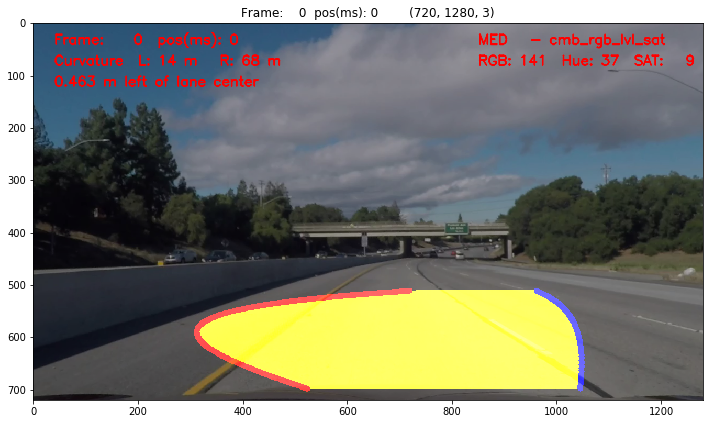

Frame:    1 - 33.37 ms - Image RGB: 125  (117,124,133)         WARPED RGB: 141  HLS:  65   H:  43   L: 142   S:   9    MED   - cmb_rgb_lvl_sat
  NZ pixels  - in image  :     7155   search reg:     5442      Nz to imgPixel Ratio: % 0.78    Nz to SrchRegion Ratio : % 3.94    Nz to ImageNz Ratio: %76.05
  Detected Pixel Count L :     3408   R         :     2034      Detected Pixel Ratio  L: % 4.93    R: % 2.94 
  Perspective transform source points -  OffCtr Pxls: -88.0    max_diffs: 1103    imgPxlRatio: 0.78  acceptCode: -10
Frame:    2 - 66.73 ms - Image RGB: 125  (117,124,133)         WARPED RGB: 142  HLS:  64   H:  43   L: 142   S:   9    MED   - cmb_rgb_lvl_sat
  NZ pixels  - in image  :     6371   search reg:     4909      Nz to imgPixel Ratio: % 0.69    Nz to SrchRegion Ratio : % 3.55    Nz to ImageNz Ratio: %77.04
  Detected Pixel Count L :     3673   R         :     1236      Detected Pixel Ratio  L: % 5.31    R: % 1.79 
  Perspective transform source points -  OffCtr Pxls: -88.0

  NZ pixels  - in image  :     4628   search reg:     3275      Nz to imgPixel Ratio: % 0.50    Nz to SrchRegion Ratio : % 2.37    Nz to ImageNz Ratio: %70.75
  Detected Pixel Count L :     2936   R         :      339      Detected Pixel Ratio  L: % 4.25    R: % 0.49 
  Perspective transform source points -  OffCtr Pxls: -88.0    max_diffs: 1103    imgPxlRatio: 0.5  acceptCode: -10
Frame:   18 - 600.6 ms - Image RGB: 124  (117,123,131)         WARPED RGB: 141  HLS:  62   H:  35   L: 142   S:   9    MED   - cmb_rgb_lvl_sat
  NZ pixels  - in image  :     4188   search reg:     2820      Nz to imgPixel Ratio: % 0.45    Nz to SrchRegion Ratio : % 2.04    Nz to ImageNz Ratio: %67.32
  Detected Pixel Count L :     2633   R         :      187      Detected Pixel Ratio  L: % 3.81    R: % 0.27 
  Perspective transform source points -  OffCtr Pxls: -88.0    max_diffs: 1103    imgPxlRatio: 0.45  acceptCode: -10
Frame:   19 - 633.97 ms - Image RGB: 124  (117,123,131)         WARPED RGB: 141  HLS: 

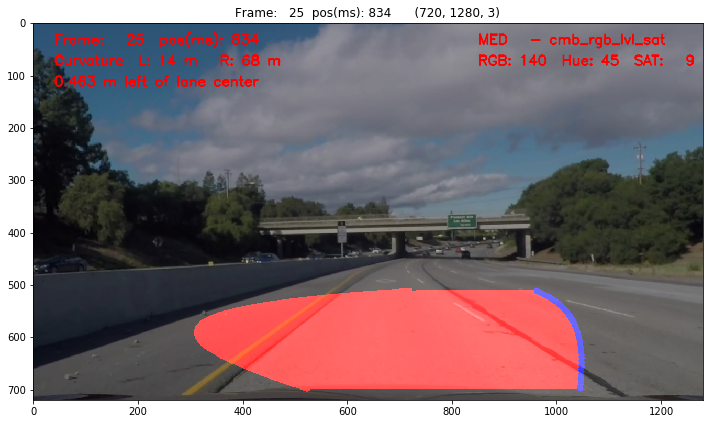

Frame:   26 - 867.53 ms - Image RGB: 124  (118,124,132)         WARPED RGB: 140  HLS:  64   H:  42   L: 141   S:   9    MED   - cmb_rgb_lvl_sat
 reset_x_base  True
  NZ pixels  - in image  :     6195   search reg:     3531      Nz to imgPixel Ratio: % 0.67    Nz to SrchRegion Ratio : % 1.89    Nz to ImageNz Ratio: %56.99
  Detected Pixel Count L :     1697   R         :     1834      Detected Pixel Ratio  L: % 1.81    R: % 1.96 
  Perspective transform source points -  OffCtr Pxls: -88.0    max_diffs: 1103    imgPxlRatio: 0.67  acceptCode: -20
Frame:   27 - 900.9 ms - Image RGB: 124  (118,124,132)         WARPED RGB: 140  HLS:  64   H:  42   L: 140   S:   9    MED   - cmb_rgb_lvl_sat
 reset_x_base  True
  NZ pixels  - in image  :     7194   search reg:     3279      Nz to imgPixel Ratio: % 0.78    Nz to SrchRegion Ratio : % 1.75    Nz to ImageNz Ratio: %45.57
  Detected Pixel Count L :     1453   R         :     1826      Detected Pixel Ratio  L: % 1.55    R: % 1.95 
  Perspective tran

  Perspective transform source points -  OffCtr Pxls: -45.0    max_diffs: 3237    imgPxlRatio: 0.0  acceptCode: 0
  Adjust perspective transform source points -  OffCtr Pxls: -45.0    max_diffs: 3237    imgPxlRatio: 0.0 
Frame:   41 - 1368.03 ms - Image RGB: 124  (117,124,132)         WARPED RGB: 122  HLS:  46   H:   8   L: 122   S:   7    MED   - cmb_rgb_lvl_sat
  NZ pixels  - in image  :        0   search reg:        0      Nz to imgPixel Ratio: % 0.00    Nz to SrchRegion Ratio : % 0.00    Nz to ImageNz Ratio: % 0.00
  Detected Pixel Count L :        0   R         :        0      Detected Pixel Ratio  L: % 0.00    R: % 0.00 
  Perspective transform source points -  OffCtr Pxls: -45.0    max_diffs: 10959    imgPxlRatio: 0.0  acceptCode: 0
  Adjust perspective transform source points -  OffCtr Pxls: -45.0    max_diffs: 10959    imgPxlRatio: 0.0 
Frame:   42 - 1401.4 ms - Image RGB: 124  (117,124,132)         WARPED RGB: 115  HLS: 111   H: 104   L: 114   S: 116    HISAT - cmb_mag_x 


E:\Users\kevin\OneDrive\git_projs\CarND-Advanced-Lane-Lines\common\sobel.py:202: RuntimeWarning: invalid value encountered in true_divide
  scaled_sobel = np.uint8(255 * abs_sobel / abs_sobel.max())
E:\Users\kevin\OneDrive\git_projs\CarND-Advanced-Lane-Lines\common\sobel.py:225: RuntimeWarning: invalid value encountered in true_divide
  scaled_sobel = np.uint8(255 * abs_sobel / abs_sobel.max())
E:\Users\kevin\OneDrive\git_projs\CarND-Advanced-Lane-Lines\common\sobel.py:256: RuntimeWarning: invalid value encountered in true_divide
  scaled_sobel = np.uint8(255 * abs_sobel / abs_sobel.max())


  NZ pixels  - in image  :        0   search reg:        0      Nz to imgPixel Ratio: % 0.00    Nz to SrchRegion Ratio : % 0.00    Nz to ImageNz Ratio: % 0.00
  Detected Pixel Count L :        0   R         :        0      Detected Pixel Ratio  L: % 0.00    R: % 0.00 


In [ ]:
INFO_INTERVAL = 25
MODE    = 1 
DISPLAY = False
DEBUG   = False
DEBUG2  = False

rc1 = Pipeline.inVideo.getNextFrame()

while rc1:   ##  and Pipeline.inVideo.currFrameNum < 200 :
    
    output, disp = Pipeline(displayResults = DISPLAY, debug = DEBUG, debug2 = DEBUG2)
    Pipeline.outVideo.saveFrameToVideo(output, debug = False)        

    if Pipeline.inVideo.currFrameNum % INFO_INTERVAL == 0 :
        print(' > ',datetime.time(datetime.now())," - " , Pipeline.inVideo.frameTitle  )
        display_one(output, title = Pipeline.inVideo.frameTitle)    
    
    rc1 = Pipeline.inVideo.getNextFrame()

print(' getNextFrame() returned : ', rc1)
Pipeline.outVideo.closeVideoFile()

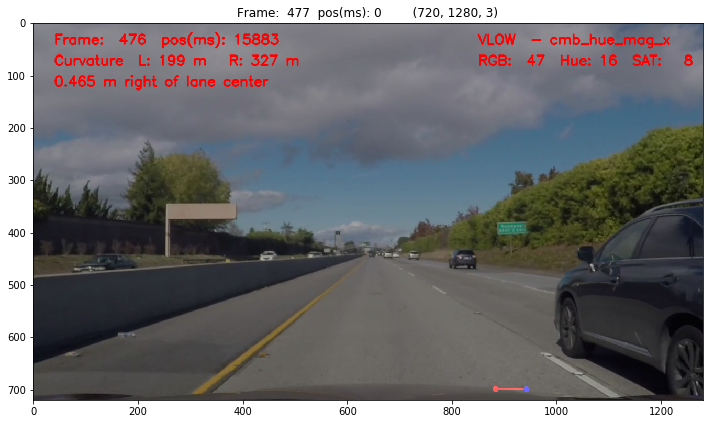

In [7]:
 display_one(output, title = Pipeline.inVideo.frameTitle)  

In [8]:
Pipeline.inVideo.closeVideoFile()
Pipeline.outVideo.closeVideoFile()

 input video file closed
 output video file closed


## ALF Pipeline - Process `harder_challenge_video.mp4` 